## ARIMA Model

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime , calendar
import statistics as st
import math

import os

### Read Dataframe as df - modify INFORMYear to Index

In [5]:
df = pd.read_csv("2015-2024_year_df_INFORM_index_core_indicators_mean_index.csv", index_col = 'INFORMYear', parse_dates=True)
df.head()

INFORM Index Category  Year      Country Iso3  \
INFORMYear                                                 
2015-01-01             Very High  2015  Afghanistan  AFG   
2016-01-01             Very High  2016  Afghanistan  AFG   
2017-01-01             Very High  2017  Afghanistan  AFG   
2018-01-01             Very High  2018  Afghanistan  AFG   
2019-01-01             Very High  2019  Afghanistan  AFG   

            % of Populations at risk of Plasmodium falciparum malaria  \
INFORMYear                                                              
2015-01-01                                           0.872426           
2016-01-01                                           0.856048           
2017-01-01                                           0.857293           
2018-01-01                                           0.857636           
2019-01-01                                           0.856141           

            Access to Health Care  Access to electricity  \
INFORMYear                                                 
2015-01-01                    8.9              45.300000   
2016-01-01                    8.6              37.200000   
2017-01-01                    8.6              48.949998   
2018-01-01                    8.3              48.949998   
2019-01-01                    8.0              47.065439   

            Access to improved sanitation facilities  Adult literacy rate  \
INFORMYear                                                                  
2015-01-01                                       6.5                  9.9   
2016-01-01                                       6.4                  9.9   
2017-01-01                                       6.2                  9.9   
2018-01-01                                       6.0                  9.9   
2019-01-01                                       5.8                  9.0   

            Adult prevalence of HIV-AIDS  ...  Total refugees  Under 5  \
INFORMYear                                ...                            
2015-01-01                          0.15  ...         16922.0      8.1   
2016-01-01                          0.15  ...        300480.0      8.0   
2017-01-01                          0.15  ...        257631.0      8.0   
2018-01-01                          0.15  ...         59893.0      7.9   
2019-01-01                          0.15  ...         76142.0      7.8   

            Under-five mortality rate  Urban population growth (annual %)  \
INFORMYear                                                                  
2015-01-01                        5.6                            4.531768   
2016-01-01                        5.4                            3.996008   
2017-01-01                        5.2                            3.452643   
2018-01-01                        5.0                            3.781557   
2019-01-01                        4.8                            3.850833   

            Vets per capita  Violent Conflict probability Score  \
INFORMYear                                                        
2015-01-01         0.008513                                10.0   
2016-01-01         0.009460                                10.0   
2017-01-01         0.007469                                10.0   
2018-01-01         0.005934                                10.0   
2019-01-01         0.005934                                10.0   

            Volume of remittances  Vulnerability Index  Vulnerable Groups  \
INFORMYear                                                                  
2015-01-01                    0.4                  7.7                6.7   
2016-01-01                    0.6                  7.8                7.3   
2017-01-01                    1.2                  7.8                7.4   
2018-01-01                    1.5                  7.7                7.3   
2019-01-01                    1.5                  8.3                8.6   

            Mean_INFORM_Index  
INFORMYear      

In [6]:
df_vlow = df[df['Mean_INFORM_Index'].between (0, 2.2)]
df_vlow.shape

(380, 64)

In [7]:
df_low = df[df['Mean_INFORM_Index'].between (2.2,3.1)] # greater than or equal to 2.2, to less than 3.1
df_low.shape

(490, 64)

In [8]:
df_med = df[df['Mean_INFORM_Index'].between (3.1,4.9)]
df_med.shape

(670, 64)

In [9]:
df_high = df[df['Mean_INFORM_Index'].between (4.9,7)]
df_high.shape

(310, 64)

In [10]:
df_vhigh = df[df['Mean_INFORM_Index'].between (7,10)]
df_vhigh.shape

(70, 64)

In [8]:
df_vhigh.head()

INFORM Index Category  Year      Country Iso3  \
INFORMYear                                                 
2015-01-01             Very High  2015  Afghanistan  AFG   
2016-01-01             Very High  2016  Afghanistan  AFG   
2017-01-01             Very High  2017  Afghanistan  AFG   
2018-01-01             Very High  2018  Afghanistan  AFG   
2019-01-01             Very High  2019  Afghanistan  AFG   

            % of Populations at risk of Plasmodium falciparum malaria  \
INFORMYear                                                              
2015-01-01                                           0.872426           
2016-01-01                                           0.856048           
2017-01-01                                           0.857293           
2018-01-01                                           0.857636           
2019-01-01                                           0.856141           

            Access to Health Care  Access to electricity  \
INFORMYear                                                 
2015-01-01                    8.9              45.300000   
2016-01-01                    8.6              37.200000   
2017-01-01                    8.6              48.949998   
2018-01-01                    8.3              48.949998   
2019-01-01                    8.0              47.065439   

            Access to improved sanitation facilities  Adult literacy rate  \
INFORMYear                                                                  
2015-01-01                                       6.5                  9.9   
2016-01-01                                       6.4                  9.9   
2017-01-01                                       6.2                  9.9   
2018-01-01                                       6.0                  9.9   
2019-01-01                                       5.8                  9.0   

            Adult prevalence of HIV-AIDS  ...  Total refugees  Under 5  \
INFORMYear                                ...                            
2015-01-01                          0.15  ...         16922.0      8.1   
2016-01-01                          0.15  ...        300480.0      8.0   
2017-01-01                          0.15  ...        257631.0      8.0   
2018-01-01                          0.15  ...         59893.0      7.9   
2019-01-01                          0.15  ...         76142.0      7.8   

            Under-five mortality rate  Urban population growth (annual %)  \
INFORMYear                                                                  
2015-01-01                        5.6                            4.531768   
2016-01-01                        5.4                            3.996008   
2017-01-01                        5.2                            3.452643   
2018-01-01                        5.0                            3.781557   
2019-01-01                        4.8                            3.850833   

            Vets per capita  Violent Conflict probability Score  \
INFORMYear                                                        
2015-01-01         0.008513                                10.0   
2016-01-01         0.009460                                10.0   
2017-01-01         0.007469                                10.0   
2018-01-01         0.005934                                10.0   
2019-01-01         0.005934                                10.0   

            Volume of remittances  Vulnerability Index  Vulnerable Groups  \
INFORMYear                                                                  
2015-01-01                    0.4                  7.7                6.7   
2016-01-01                    0.6                  7.8                7.3   
2017-01-01                    1.2                  7.8                7.4   
2018-01-01                    1.5                  7.7                7.3   
2019-01-01                    1.5                  8.3                8.6   

            Mean_INFORM_Index  
INFORMYear      

### Autoregressive Integrated Moving Average (ARIMA) Model 

- Belongs to a class of models that explains a given time series based on its own past values to forecast future values i.e. equation based on its own lags & the lagged forecast errors 

- Forecasting algorithm based on the idea that the information in the past values of the time series can alone be used to predict the future values

- Any ‘non-seasonal’ time series that exhibits patterns & not a random white noise can be modeled with ARIMA models.

- Specified by 3 order parameters: (p, d, q)
        - p is the order of the AR term
        - q is the order of the MA term
        - d is the number of differencing required to make the time series stationary

#### AR(p) Autoregression 
- Regression model that utilizes the dependent relationship between a current observation & observations over a previous period
- An auto regressive (AR(p)) component refers to the use of past values in the regression equation for the time series)

#### I(d) Integration
- Uses differencing of observations (subtracting an observation from observation at the previous time step) in order to make the time series stationary. 
- Differencing involves the subtraction of the current values of a series with its previous values d number of times.

#### MA(q) Moving Average 
- A model that uses the dependency between an observation & a residual error from a moving average model applied to lagged observations. A moving average component depicts the error of the model as a combination of previous error terms. The order q represents the number of terms to be included in the model.

#### Types of ARIMA Model
- ARIMA : Non-seasonal Autoregressive Integrated Moving Averages
- SARIMA : Seasonal ARIMA, if a time series has seasonal patterns, then add seasonal terms
- SARIMAX : Seasonal ARIMA with exogenous variables


### Checking Autocorrelation
- Autocorrelation is the correlation of a series with its own lags. 
- If a series is significantly autocorrelated, that means, the previous values of the series (lags) may be helpful in predicting the current value.
- Partial Autocorrelation also conveys similar information but it conveys the pure correlation of a series & its lag, excluding the correlation contributions from the intermediate lags.

https://www.kdnuggets.com/2023/08/times-series-analysis-arima-models-python.html
https://www.kdnuggets.com/2020/01/stock-market-forecasting-time-series-analysis.html

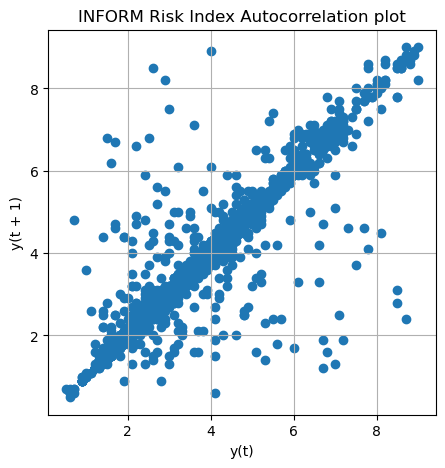

          t-1       t+1
t-1  1.000000  0.024989
t+1  0.024989  1.000000


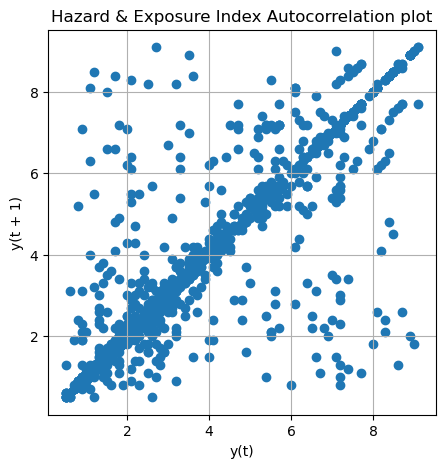

          t-1       t+1
t-1  1.000000 -0.025412
t+1 -0.025412  1.000000


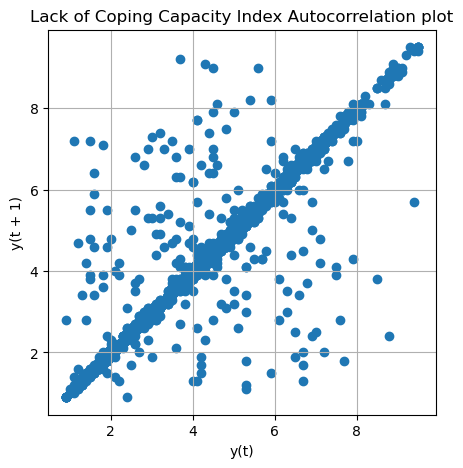

          t-1       t+1
t-1  1.000000  0.033073
t+1  0.033073  1.000000


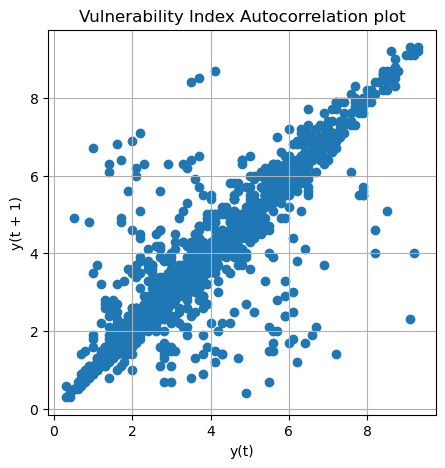

         t-1      t+1
t-1  1.00000  0.02114
t+1  0.02114  1.00000


In [12]:
from pandas.plotting import lag_plot
from pandas import DataFrame, concat

# List of risk indices
risk_indices = ['INFORM Risk Index', 'Hazard & Exposure Index', 'Lack of Coping Capacity Index', 'Vulnerability Index']

# Iterate over each risk index
for risk_index in risk_indices:
    # Create a lag plot
    plt.figure(figsize=(5,5))
    lag_plot(df[risk_index], lag=1)
    plt.title(f'{risk_index} Autocorrelation plot')  # Set plot title
    plt.grid(True)  # Add gridlines
    plt.show()  # Show the plot

    # Calculate correlation between lagged values
    values = DataFrame(df[risk_index].values)
    dataframe = concat([values.shift(120), values], axis=1)
    dataframe.columns = ['t-1', 't+1']
    result = dataframe.corr()
    print(result)

In [14]:
#from pandas.plotting import lag_plot

#plt.figure(figsize=(5,5))
#lag_plot(df['INFORM Risk Index'], lag=1)
#plt.title('INFORM Risk Index Autocorrelation plot')
#plt.grid(True)
#plt.legend();

#from pandas import DataFrame
#from pandas import concat
#values = DataFrame(df['INFORM Risk Index'].values)
#dataframe = concat([values.shift(120), values], axis=1)
#dataframe.columns = ['t-1', 't+1']
#result = dataframe.corr()
#print(result)

#### Partial Autocorrelation suggests that  'p', the order of the AR term, should be 1

In [38]:
#from statsmodels.tsa.stattools import acf, pacf
#from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Draw Plot
#fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
#plot_acf(df['INFORM Risk Index'].tolist(), lags=10, ax=axes[0])
#plot_pacf(df['INFORM Risk Index'].tolist(), lags=10, ax=axes[1])
#plt.show()

### Test for Stationarity

- I(d) Integration

-  Uses differencing of observations (subtracting an observation from observation at the previous time step) in order to make the time series stationary.
-   Differencing involves the subtraction of the current values of a series with its previous values d number of times.
https://www.kdnuggets.com/2020/01/stock-market-forecasting-time-series-analysis.html

- A stationary time series has statistical properties or moments (e.g., mean & variance) that do not vary in time. 
- Stationarity is the status of a stationary time series. Conversely, nonstationarity is the status of a time series whose statistical properties are changing through time
https://serc.carleton.edu/hydromodules/steps/236435.html

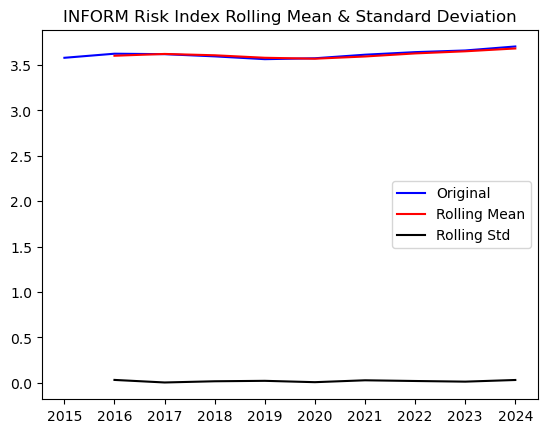

INFORM Risk Index Results of dickey fuller test
Test Statistics                2.473450
p-value                        0.999041
No. of lags used               3.000000
Number of observations used    6.000000
critical value (1%)           -5.354256
critical value (5%)           -3.646238
critical value (10%)          -2.901198
dtype: float64


In [39]:
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

#Test for stationarity
def test_stationarity(timeseries):
    #Determining rolling statistics
    rolmean = timeseries.rolling(2).mean()
    rolstd = timeseries.rolling(2).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('INFORM Risk Index Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print("INFORM Risk Index Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(df.groupby('INFORMYear')['INFORM Risk Index'].mean())

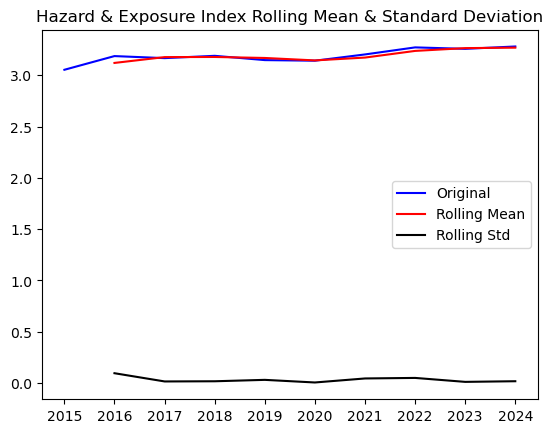

Hazard & Exposure Index Results of dickey fuller test
Test Statistics                7.168834
p-value                        1.000000
No. of lags used               3.000000
Number of observations used    6.000000
critical value (1%)           -5.354256
critical value (5%)           -3.646238
critical value (10%)          -2.901198
dtype: float64


In [40]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(2).mean()
    rolstd = timeseries.rolling(2).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Hazard & Exposure Index Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print("Hazard & Exposure Index Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')

    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(df.groupby('INFORMYear')['Hazard & Exposure Index'].mean())

In [41]:
def test_stationarity(timeseries):
    #Determining rolling statistics
    rolmean = timeseries.rolling(2).mean()
    rolstd = timeseries.rolling(2).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Lack of Coping Capacity Index Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print("Lack of Coping Capacity Index Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')

    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(df.groupby('INFORMYear')['Lack of Coping Capacity Index'].mean())

Lack of Coping Capacity Index Results of dickey fuller test
Test Statistics               -4.693599
p-value                        0.000087
No. of lags used               2.000000
Number of observations used    7.000000
critical value (1%)           -4.938690
critical value (5%)           -3.477583
critical value (10%)          -2.843868
dtype: float64


In [42]:
def test_stationarity(timeseries):
    #Determining rolling statistics
    rolmean = timeseries.rolling(2).mean()
    rolstd = timeseries.rolling(2).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Vulnerability Index Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print("Vulnerability Index Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')

    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(df.groupby('INFORMYear')['Vulnerability Index'].mean())

Vulnerability Index Results of dickey fuller test
Test Statistics               -0.771990
p-value                        0.827212
No. of lags used               3.000000
Number of observations used    6.000000
critical value (1%)           -5.354256
critical value (5%)           -3.646238
critical value (10%)          -2.901198
dtype: float64


## ARIMA Model: Fit & Forecast 

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.metrics import mean_squared_error, mean_absolute_error # to evaluate the model
import numpy as np

from pandas.tseries.offsets import DateOffset

### INFORM Risk Index Forecast

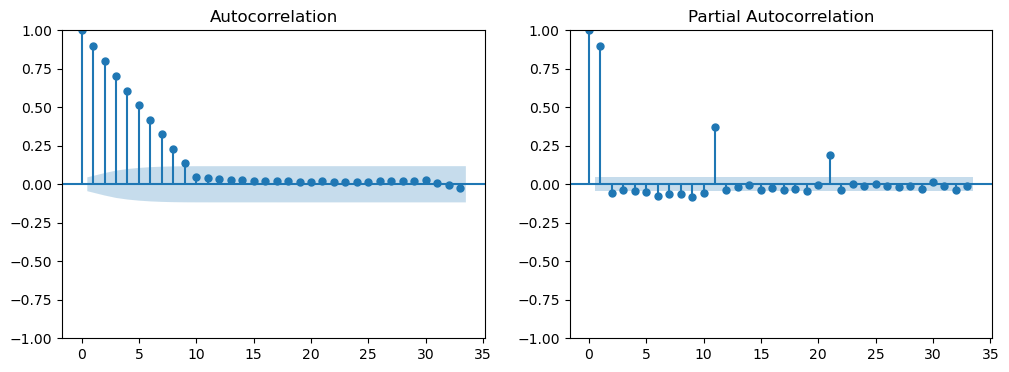

C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Use

                               SARIMAX Results                                
Dep. Variable:      INFORM Risk Index   No. Observations:                 1910
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2128.094
Date:                Mon, 08 Apr 2024   AIC                           4262.187
Time:                        02:50:43   BIC                           4278.850
Sample:                             0   HQIC                          4268.320
                               - 1910                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9033      0.012     73.023      0.000       0.879       0.928
ma.L1         -0.9999      0.059    -16.983      0.000      -1.115      -0.885
sigma2         0.5430      0.030     17.965      0.0

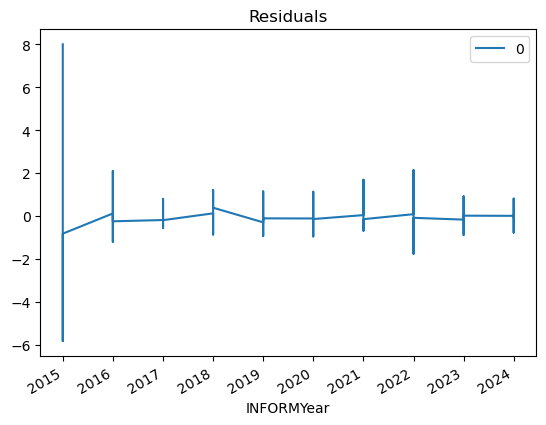

C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


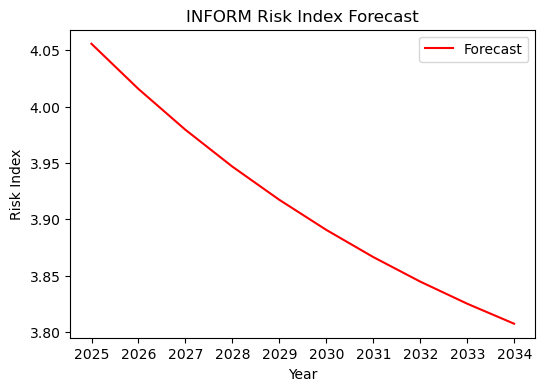

Mean Squared Error (MSE): 0.10595662427130725
Mean Absolute Error (MAE): 0.29619233818658486
Root Mean Squared Error (RMSE): 0.32550979136011754


C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [103]:
# Visualize the time series data - Figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
# Plot 1:
#axes[0].grid(True)
axes[0].set_xlabel('Years')
axes[0].set_ylabel('Risk Indices (0-10)')
axes[0].plot(df['INFORM Risk Index'], color = 'darkgrey')
axes[0].set_title("All Countries' INFORM Risk Indices (2015-2024)")
axes[0].set_ylim([0, 10])

# Plot 2:
#axes[1].grid(True)
axes[1].set_xlabel('Years')
axes[1].set_ylabel('Mean Risk Indices (0-10)')
axes[1].plot(df.groupby('INFORMYear')['INFORM Risk Index'].mean(), color = 'darkgrey')
axes[1].set_title("Mean INFORM indices (2015-2024)")
axes[1].set_ylim([3.5, 3.8])

# Check autocorrelation and partial autocorrelation
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(df['INFORM Risk Index'], ax=ax[0])
plot_pacf(df['INFORM Risk Index'], ax=ax[1])
plt.show()

# Fit ARIMA model
order = (1, 1, 1)  # Example order (p, d, q)
model = ARIMA(df['INFORM Risk Index'], order=order)
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Plot residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(title='Residuals')
plt.show()

# Get the last date in the dataset
last_date = df.index[-1]

# Calculate the start date for forecasting (first day of the following year)
start_date_forecast = last_date + DateOffset(years=0)

# Plot forecast
forecast_steps = 10  # Example number of forecast steps (for one year)
forecast_dates = pd.date_range(start=start_date_forecast, periods=forecast_steps, freq='Y')  # Start from the first day of the following year
forecast = model_fit.forecast(steps=forecast_steps)

# Plot forecast
#forecast_steps = 10  # Example number of forecast steps
#forecast_dates = pd.date_range(start=df.index[-1], periods=forecast_steps + 1, freq='Y')[1:]  # Set frequency to 'Y' for yearly
#forecast = model_fit.forecast(steps=forecast_steps)

plt.figure(figsize=(6, 4))
# plt.plot(df.index, df['INFORM Risk Index'], label='Original', color= 'darkgrey') - plots all index data 2015-2024 as above
plt.plot(forecast_dates, forecast, color='red', label='Forecast')
plt.title('INFORM Risk Index Forecast')
plt.xlabel('Year')
plt.ylabel('Risk Index')
plt.legend()
plt.show()

# Evaluate the model
# Make sure to have the actual values available for comparison
actual_values = df['INFORM Risk Index'].iloc[-forecast_steps:]  # Actual values for the forecast period

# Calculate predictions
forecast_values = model_fit.forecast(steps=forecast_steps)

# Calculate performance metrics
mse = mean_squared_error(actual_values, forecast_values)
mae = mean_absolute_error(actual_values, forecast_values)
rmse = np.sqrt(mse)

# Print performance metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

### INFORM Risk Index Predictions by Risk Category

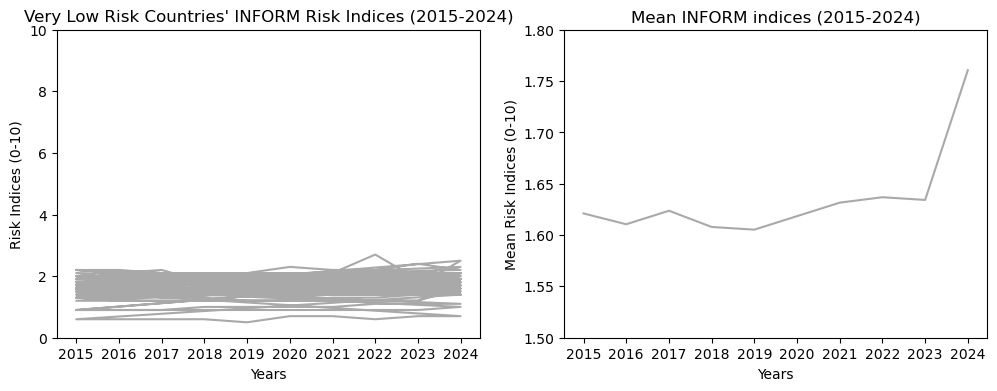

C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Use

                               SARIMAX Results                                
Dep. Variable:      INFORM Risk Index   No. Observations:                  380
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  84.230
Date:                Mon, 08 Apr 2024   AIC                           -162.460
Time:                        03:19:44   BIC                           -150.648
Sample:                             0   HQIC                          -157.772
                                - 380                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0710      0.420      0.169      0.866      -0.752       0.894
ma.L1         -0.2844      0.424     -0.670      0.503      -1.116       0.547
sigma2         0.0375      0.001     27.819      0.0

C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Mean Squared Error (MSE): 0.12437508160867335
Mean Absolute Error (MAE): 0.2830012484014993
Root Mean Squared Error (RMSE): 0.35266851519333753


C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [119]:
# Visualize the time series data - Figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
# Plot 1:
axes[0].set_xlabel('Years')
axes[0].set_ylabel('Risk Indices (0-10)')
axes[0].plot(df_vlow['INFORM Risk Index'], color = 'darkgrey')
axes[0].set_title("Very Low Risk Countries' INFORM Risk Indices (2015-2024)")
axes[0].set_ylim([0, 10])

# Plot 2:
axes[1].set_xlabel('Years')
axes[1].set_ylabel('Mean Risk Indices (0-10)')
axes[1].plot(df_vlow.groupby('INFORMYear')['INFORM Risk Index'].mean(), color = 'darkgrey')
axes[1].set_title("Mean INFORM indices (2015-2024)")
axes[1].set_ylim([1.5, 1.8])

# Check autocorrelation and partial autocorrelation
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(df_vlow['INFORM Risk Index'], ax=ax[0])
plot_pacf(df_vlow['INFORM Risk Index'], ax=ax[1])
plt.show()

# Fit ARIMA model
order = (1, 1, 1)  # Example order (p, d, q)
model = ARIMA(df_vlow['INFORM Risk Index'], order=order)
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Plot residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(title='Residuals')
plt.show()

# Get the last date in the dataset
last_date = df_vlow.index[-1]

# Calculate the start date for forecasting (first day of the following year)
start_date_forecast = last_date + DateOffset(years=0)

# Plot forecast
forecast_steps = 10  # Example number of forecast steps (for one year)
forecast_dates = pd.date_range(start=start_date_forecast, periods=forecast_steps, freq='Y')  # Start from the first day of the following year
forecast = model_fit.forecast(steps=forecast_steps)

plt.figure(figsize=(6, 4))
plt.plot(forecast_dates, forecast, color='red', label='Forecast')
plt.title('INFORM Risk Index Forecast')
plt.xlabel('Year')
plt.ylabel('Risk Index')
plt.legend()
plt.show()

# Evaluate the model
# Make sure to have the actual values available for comparison
actual_values = df_vlow['INFORM Risk Index'].iloc[-forecast_steps:]  # Actual values for the forecast period

# Calculate predictions
forecast_values = model_fit.forecast(steps=forecast_steps)

# Calculate performance metrics
mse = mean_squared_error(actual_values, forecast_values)
mae = mean_absolute_error(actual_values, forecast_values)
rmse = np.sqrt(mse)

# Print performance metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

#### Low Risk Countries

C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Use

                               SARIMAX Results                                
Dep. Variable:      INFORM Risk Index   No. Observations:                  490
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 131.461
Date:                Mon, 08 Apr 2024   AIC                           -256.922
Time:                        03:26:37   BIC                           -244.344
Sample:                             0   HQIC                          -251.982
                                - 490                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8097      0.033     24.459      0.000       0.745       0.875
ma.L1         -0.9952      0.011    -94.641      0.000      -1.016      -0.975
sigma2         0.0340      0.001     22.974      0.0

C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


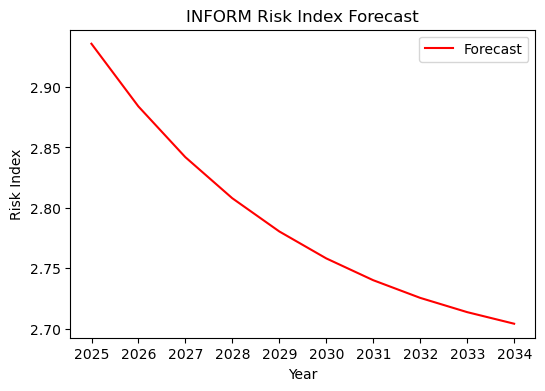

Mean Squared Error (MSE): 0.04001319377486952
Mean Absolute Error (MAE): 0.16483573517531735
Root Mean Squared Error (RMSE): 0.20003298171768955


C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [123]:
# Visualize the time series data - Figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
# Plot 1:
axes[0].set_xlabel('Years')
axes[0].set_ylabel('Risk Indices (0-10)')
axes[0].plot(df_low['INFORM Risk Index'], color = 'darkgrey')
axes[0].set_title("Low Risk Countries' INFORM Risk Indices (2015-2024)")
axes[0].set_ylim([0, 10])

# Plot 2:
axes[1].set_xlabel('Years')
axes[1].set_ylabel('Mean Risk Indices (0-10)')
axes[1].plot(df_low.groupby('INFORMYear')['INFORM Risk Index'].mean(), color = 'darkgrey')
axes[1].set_title("Mean INFORM indices (2015-2024)")
axes[1].set_ylim([2.5, 2.8])

# Check autocorrelation and partial autocorrelation
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(df_low['INFORM Risk Index'], ax=ax[0])
plot_pacf(df_low['INFORM Risk Index'], ax=ax[1])
plt.show()

# Fit ARIMA model
order = (1, 1, 1)  # Example order (p, d, q)
model = ARIMA(df_low['INFORM Risk Index'], order=order)
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Plot residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(title='Residuals')
plt.show()

# Get the last date in the dataset
last_date = df_low.index[-1]

# Calculate the start date for forecasting (first day of the following year)
start_date_forecast = last_date + DateOffset(years=0)

# Plot forecast
forecast_steps = 10  # Example number of forecast steps (for one year)
forecast_dates = pd.date_range(start=start_date_forecast, periods=forecast_steps, freq='Y')  # Start from the first day of the following year
forecast = model_fit.forecast(steps=forecast_steps)

plt.figure(figsize=(6, 4))
plt.plot(forecast_dates, forecast, color='red', label='Forecast')
plt.title('INFORM Risk Index Forecast')
plt.xlabel('Year')
plt.ylabel('Risk Index')
plt.legend()
plt.show()

# Evaluate the model
# Make sure to have the actual values available for comparison
actual_values = df_low['INFORM Risk Index'].iloc[-forecast_steps:]  # Actual values for the forecast period

# Calculate predictions
forecast_values = model_fit.forecast(steps=forecast_steps)

# Calculate performance metrics
mse = mean_squared_error(actual_values, forecast_values)
mae = mean_absolute_error(actual_values, forecast_values)
rmse = np.sqrt(mse)

# Print performance metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

#### Medium Risk

C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Use

                               SARIMAX Results                                
Dep. Variable:      INFORM Risk Index   No. Observations:                  670
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -256.884
Date:                Mon, 08 Apr 2024   AIC                            519.769
Time:                        03:31:16   BIC                            533.286
Sample:                             0   HQIC                           525.005
                                - 670                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7791      0.020     38.624      0.000       0.740       0.819
ma.L1         -0.9983      0.011    -94.869      0.000      -1.019      -0.978
sigma2         0.1255      0.003     36.389      0.0

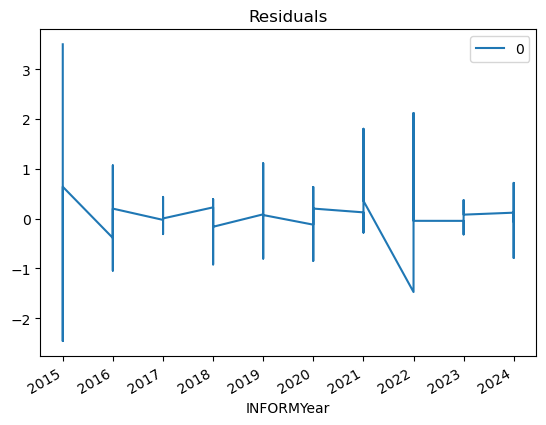

C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


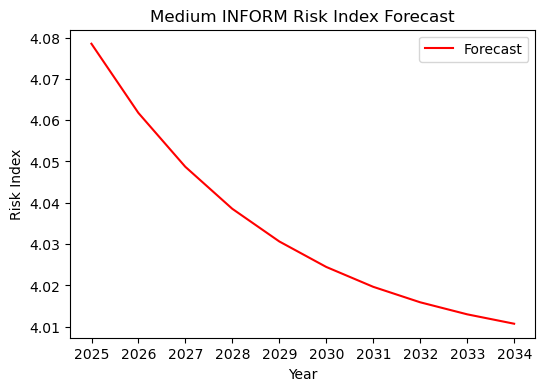

Mean Squared Error (MSE): 0.043539913880008316
Mean Absolute Error (MAE): 0.18150402194164225
Root Mean Squared Error (RMSE): 0.2086622004101565


C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [127]:
# Visualize the time series data - Figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
# Plot 1:
axes[0].set_xlabel('Years')
axes[0].set_ylabel('Risk Indices (0-10)')
axes[0].plot(df_med['INFORM Risk Index'], color = 'darkgrey')
axes[0].set_title("Medium Risk Countries' INFORM Risk Indices (2015-2024)")
axes[0].set_ylim([0, 10])

# Plot 2:
axes[1].set_xlabel('Years')
axes[1].set_ylabel('Mean Risk Indices (0-10)')
axes[1].plot(df_med.groupby('INFORMYear')['INFORM Risk Index'].mean(), color = 'darkgrey')
axes[1].set_title("Mean INFORM indices (2015-2024)")
axes[1].set_ylim([3.9, 4.1])

# Check autocorrelation and partial autocorrelation
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(df_med['INFORM Risk Index'], ax=ax[0])
plot_pacf(df_med['INFORM Risk Index'], ax=ax[1])
plt.show()

# Fit ARIMA model
order = (1, 1, 1)  # Example order (p, d, q)
model = ARIMA(df_med['INFORM Risk Index'], order=order)
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Plot residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(title='Residuals')
plt.show()

# Get the last date in the dataset
last_date = df_med.index[-1]

# Calculate the start date for forecasting (first day of the following year)
start_date_forecast = last_date + DateOffset(years=0)

# Plot forecast
forecast_steps = 10  # Example number of forecast steps (for one year)
forecast_dates = pd.date_range(start=start_date_forecast, periods=forecast_steps, freq='Y')  # Start from the first day of the following year
forecast = model_fit.forecast(steps=forecast_steps)

plt.figure(figsize=(6, 4))
plt.plot(forecast_dates, forecast, color='red', label='Forecast')
plt.title('Medium INFORM Risk Index Forecast')
plt.xlabel('Year')
plt.ylabel('Risk Index')
plt.legend()
plt.show()

# Evaluate the model
# Make sure to have the actual values available for comparison
actual_values = df_med['INFORM Risk Index'].iloc[-forecast_steps:]  # Actual values for the forecast period

# Calculate predictions
forecast_values = model_fit.forecast(steps=forecast_steps)

# Calculate performance metrics
mse = mean_squared_error(actual_values, forecast_values)
mae = mean_absolute_error(actual_values, forecast_values)
rmse = np.sqrt(mse)

# Print performance metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

#### High Risk

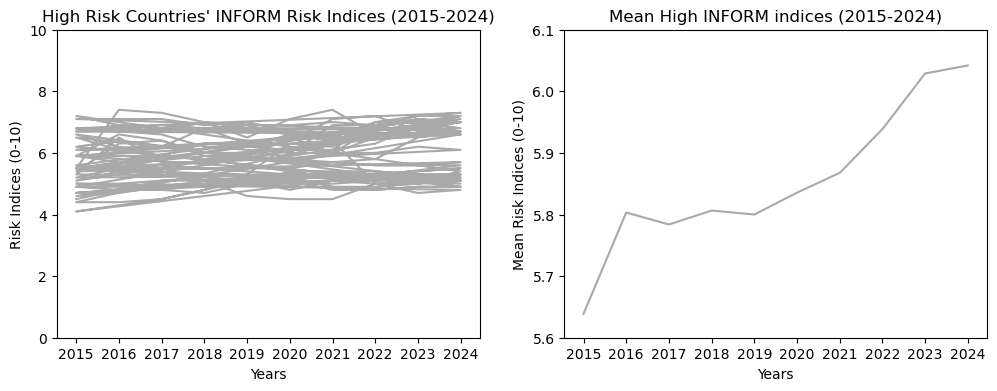

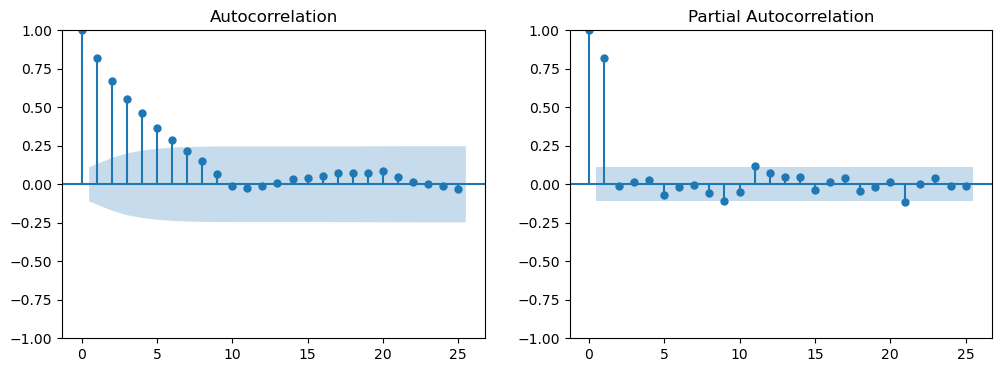

C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Use

                               SARIMAX Results                                
Dep. Variable:      INFORM Risk Index   No. Observations:                  310
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -194.659
Date:                Mon, 08 Apr 2024   AIC                            395.318
Time:                        03:35:23   BIC                            406.518
Sample:                             0   HQIC                           399.795
                                - 310                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8215      0.047     17.302      0.000       0.728       0.915
ma.L1         -0.9888      0.013    -77.361      0.000      -1.014      -0.964
sigma2         0.2053      0.011     19.222      0.0

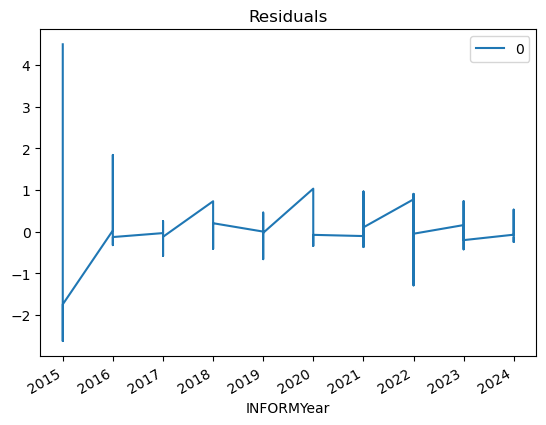

C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


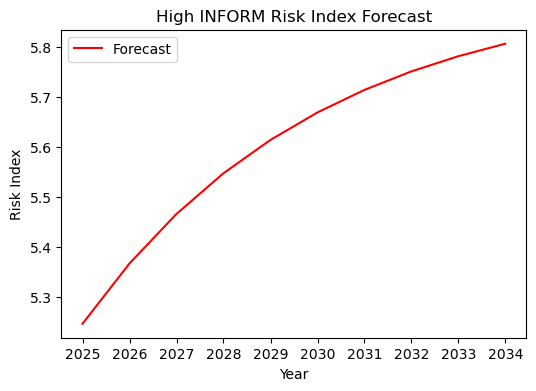

Mean Squared Error (MSE): 0.5623539349422726
Mean Absolute Error (MAE): 0.6229084757735233
Root Mean Squared Error (RMSE): 0.7499026169725457


C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [130]:
# Visualize the time series data - Figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
# Plot 1:
axes[0].set_xlabel('Years')
axes[0].set_ylabel('Risk Indices (0-10)')
axes[0].plot(df_high['INFORM Risk Index'], color = 'darkgrey')
axes[0].set_title("High Risk Countries' INFORM Risk Indices (2015-2024)")
axes[0].set_ylim([0, 10])

# Plot 2:
axes[1].set_xlabel('Years')
axes[1].set_ylabel('Mean Risk Indices (0-10)')
axes[1].plot(df_high.groupby('INFORMYear')['INFORM Risk Index'].mean(), color = 'darkgrey')
axes[1].set_title("Mean High INFORM indices (2015-2024)")
axes[1].set_ylim([5.6, 6.1])

# Check autocorrelation and partial autocorrelation
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(df_high['INFORM Risk Index'], ax=ax[0])
plot_pacf(df_high['INFORM Risk Index'], ax=ax[1])
plt.show()

# Fit ARIMA model
order = (1, 1, 1)  # Example order (p, d, q)
model = ARIMA(df_high['INFORM Risk Index'], order=order)
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Plot residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(title='Residuals')
plt.show()

# Get the last date in the dataset
last_date = df_high.index[-1]

# Calculate the start date for forecasting (first day of the following year)
start_date_forecast = last_date + DateOffset(years=0)

# Plot forecast
forecast_steps = 10  # Example number of forecast steps (for one year)
forecast_dates = pd.date_range(start=start_date_forecast, periods=forecast_steps, freq='Y')  # Start from the first day of the following year
forecast = model_fit.forecast(steps=forecast_steps)

plt.figure(figsize=(6, 4))
plt.plot(forecast_dates, forecast, color='red', label='Forecast')
plt.title('High INFORM Risk Index Forecast')
plt.xlabel('Year')
plt.ylabel('Risk Index')
plt.legend()
plt.show()

# Evaluate the model
# Make sure to have the actual values available for comparison
actual_values = df_high['INFORM Risk Index'].iloc[-forecast_steps:]  # Actual values for the forecast period

# Calculate predictions
forecast_values = model_fit.forecast(steps=forecast_steps)

# Calculate performance metrics
mse = mean_squared_error(actual_values, forecast_values)
mae = mean_absolute_error(actual_values, forecast_values)
rmse = np.sqrt(mse)

# Print performance metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

#### Very High Risk

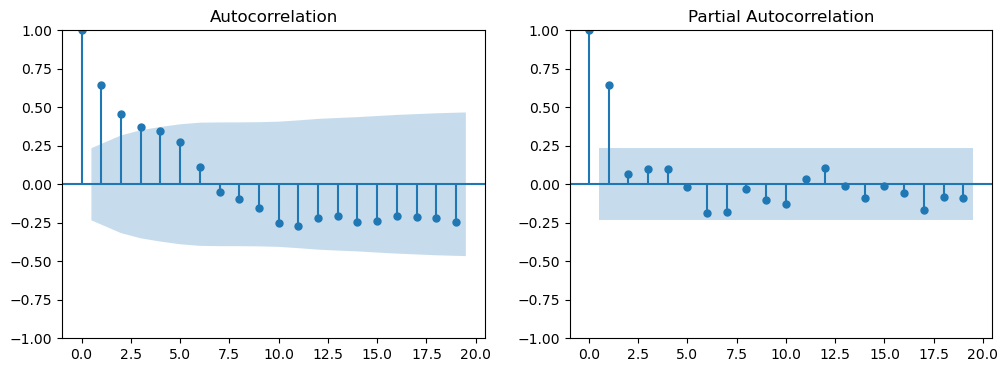

C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Use

                               SARIMAX Results                                
Dep. Variable:      INFORM Risk Index   No. Observations:                   70
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -39.666
Date:                Mon, 08 Apr 2024   AIC                             85.331
Time:                        03:39:26   BIC                             92.034
Sample:                             0   HQIC                            87.990
                                 - 70                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6683      0.127      5.274      0.000       0.420       0.917
ma.L1         -0.9992      2.783     -0.359      0.720      -6.455       4.456
sigma2         0.1779      0.502      0.355      0.7

C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


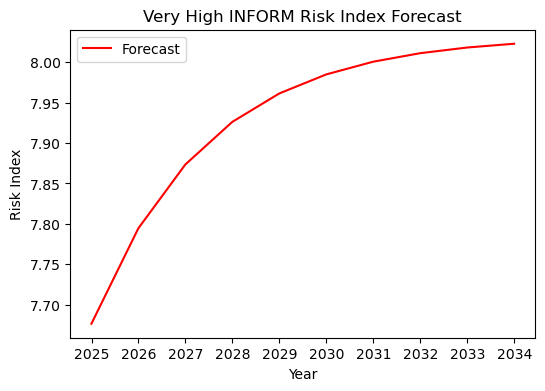

Mean Squared Error (MSE): 0.07576890740383165
Mean Absolute Error (MAE): 0.22655634355405924
Root Mean Squared Error (RMSE): 0.2752615254695644


C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [135]:
# Visualize the time series data - Figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
# Plot 1:
axes[0].set_xlabel('Years')
axes[0].set_ylabel('Risk Indices (0-10)')
axes[0].plot(df_vhigh['INFORM Risk Index'], color = 'darkgrey')
axes[0].set_title("Very High Risk Countries' INFORM Risk Indices (2015-2024)")
axes[0].set_ylim([0, 10])

# Plot 2:
axes[1].set_xlabel('Years')
axes[1].set_ylabel('Mean Risk Indices (0-10)')
axes[1].plot(df_vhigh.groupby('INFORMYear')['INFORM Risk Index'].mean(), color = 'darkgrey')
axes[1].set_title("Mean Very High INFORM indices (2015-2024)")
axes[1].set_ylim([7.8, 8.2])

# Check autocorrelation and partial autocorrelation
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(df_vhigh['INFORM Risk Index'], ax=ax[0])
plot_pacf(df_vhigh['INFORM Risk Index'], ax=ax[1])
plt.show()

# Fit ARIMA model
order = (1, 1, 1)  # Example order (p, d, q)
model = ARIMA(df_vhigh['INFORM Risk Index'], order=order)
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Plot residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(title='Residuals')
plt.show()

# Get the last date in the dataset
last_date = df_vhigh.index[-1]

# Calculate the start date for forecasting (first day of the following year)
start_date_forecast = last_date + DateOffset(years=0)

# Plot forecast
forecast_steps = 10  # Example number of forecast steps (for one year)
forecast_dates = pd.date_range(start=start_date_forecast, periods=forecast_steps, freq='Y')  # Start from the first day of the following year
forecast = model_fit.forecast(steps=forecast_steps)

plt.figure(figsize=(6, 4))
plt.plot(forecast_dates, forecast, color='red', label='Forecast')
plt.title('Very High INFORM Risk Index Forecast')
plt.xlabel('Year')
plt.ylabel('Risk Index')
plt.legend()
plt.show()

# Evaluate the model
# Make sure to have the actual values available for comparison
actual_values = df_vhigh['INFORM Risk Index'].iloc[-forecast_steps:]  # Actual values for the forecast period

# Calculate predictions
forecast_values = model_fit.forecast(steps=forecast_steps)

# Calculate performance metrics
mse = mean_squared_error(actual_values, forecast_values)
mae = mean_absolute_error(actual_values, forecast_values)
rmse = np.sqrt(mse)

# Print performance metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

### Hazard & Exposure Index

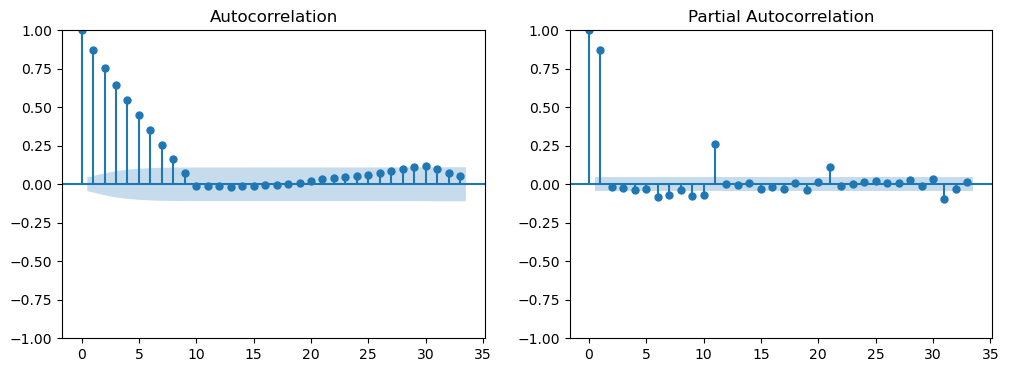

C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Use

                                  SARIMAX Results                                  
Dep. Variable:     Hazard & Exposure Index   No. Observations:                 1910
Model:                      ARIMA(1, 1, 1)   Log Likelihood               -2797.204
Date:                     Mon, 08 Apr 2024   AIC                           5600.407
Time:                             02:59:50   BIC                           5617.070
Sample:                                  0   HQIC                          5606.540
                                    - 1910                                         
Covariance Type:                       opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8733      0.012     70.885      0.000       0.849       0.897
ma.L1         -1.0000      0.142     -7.022      0.000      -1.279      -0.721
sigma2      

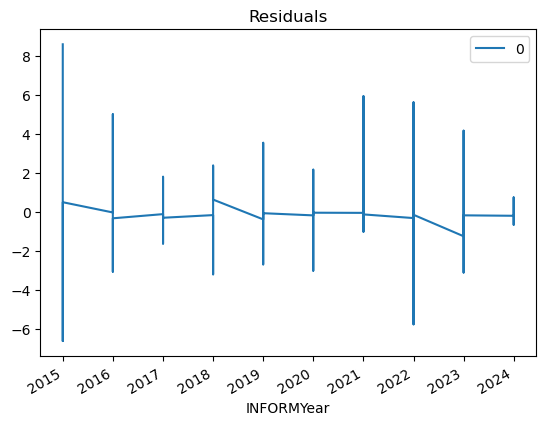

C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


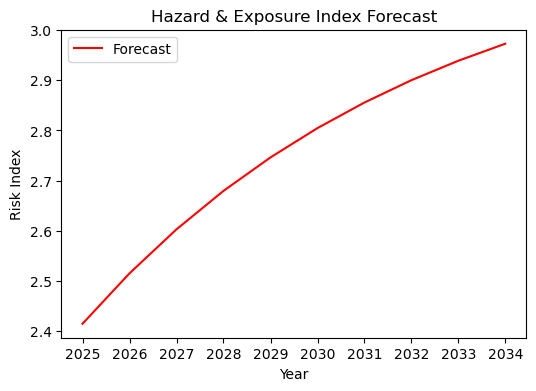

Mean Squared Error (MSE): 0.22468855088526024
Mean Absolute Error (MAE): 0.4530680413699869
Root Mean Squared Error (RMSE): 0.4740132391455541


C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [106]:
# Visualize the time series data - Figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
# Plot 1:
#axes[0].grid(True)
axes[0].set_xlabel('Years')
axes[0].set_ylabel('Risk Indices (0-10)')
axes[0].plot(df['Hazard & Exposure Index'], color = 'darkred')
axes[0].set_title("All Countries' Hazard & Exposure Risk Indices (2015-2024)")
axes[0].set_ylim([0, 10])

# Plot 2:
#axes[1].grid(True)
axes[1].set_xlabel('Years')
axes[1].set_ylabel('Mean Risk Indices (0-10)')
axes[1].plot(df.groupby('INFORMYear')['Hazard & Exposure Index'].mean(), color = 'darkred')
axes[1].set_title("Mean Hazard & Exposure indices (2015-2024)")
axes[1].set_ylim([3, 3.3])

# Check autocorrelation and partial autocorrelation
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(df['Hazard & Exposure Index'], ax=ax[0])
plot_pacf(df['Hazard & Exposure Index'], ax=ax[1])
plt.show()

# Fit ARIMA model
order = (1, 1, 1)  # Example order (p, d, q)
model = ARIMA(df['Hazard & Exposure Index'], order=order)
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Plot residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(title='Residuals')
plt.show()

# Get the last date in the dataset
last_date = df.index[-1]

# Calculate the start date for forecasting (first day of the following year)
start_date_forecast = last_date + DateOffset(years=0)

# Plot forecast
forecast_steps = 10  # Example number of forecast steps (for one year)
forecast_dates = pd.date_range(start=start_date_forecast, periods=forecast_steps, freq='Y')  # Start from the first day of the following year
forecast = model_fit.forecast(steps=forecast_steps)

plt.figure(figsize=(6, 4))
plt.plot(forecast_dates, forecast, color='red', label='Forecast')
plt.title('Hazard & Exposure Index Forecast')
plt.xlabel('Year')
plt.ylabel('Risk Index')
plt.legend()
plt.show()

# Evaluate the model
# Make sure to have the actual values available for comparison
actual_values = df['Hazard & Exposure Index'].iloc[-forecast_steps:]  # Actual values for the forecast period

# Calculate predictions
forecast_values = model_fit.forecast(steps=forecast_steps)

# Calculate performance metrics
mse = mean_squared_error(actual_values, forecast_values)
mae = mean_absolute_error(actual_values, forecast_values)
rmse = np.sqrt(mse)

# Print performance metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

#### Hazard & Exposure Index - Very Low INFORM Risk

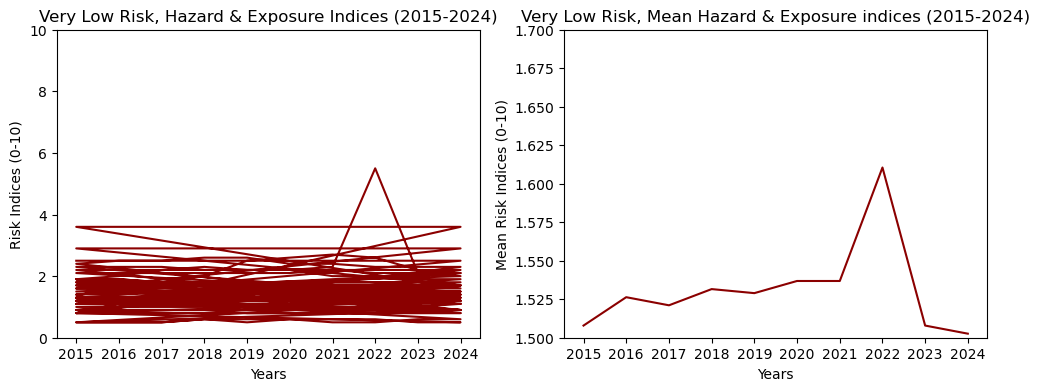

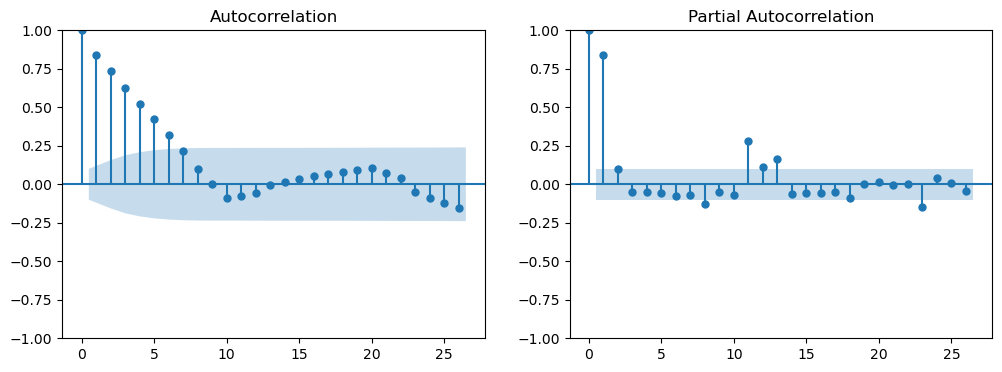

C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Use

                                  SARIMAX Results                                  
Dep. Variable:     Hazard & Exposure Index   No. Observations:                  380
Model:                      ARIMA(1, 1, 1)   Log Likelihood                -168.348
Date:                     Mon, 08 Apr 2024   AIC                            342.697
Time:                             03:50:22   BIC                            354.509
Sample:                                  0   HQIC                           347.384
                                     - 380                                         
Covariance Type:                       opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0916      0.314     -0.292      0.770      -0.706       0.523
ma.L1         -0.0865      0.315     -0.275      0.783      -0.704       0.531
sigma2      

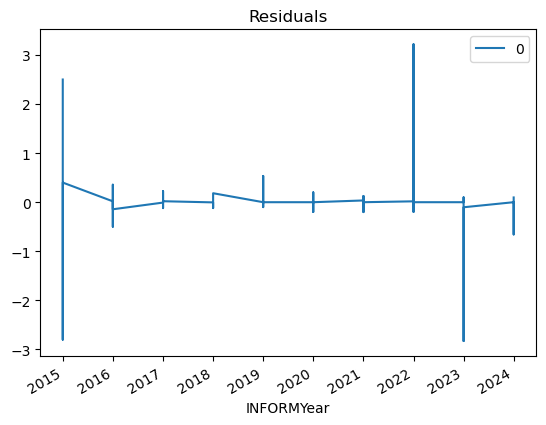

C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Mean Squared Error (MSE): 0.00762836110749214
Mean Absolute Error (MAE): 0.08343438748863088
Root Mean Squared Error (RMSE): 0.08734048950797185


C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [139]:
# Visualize the time series data - Figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
# Plot 1:
#axes[0].grid(True)
axes[0].set_xlabel('Years')
axes[0].set_ylabel('Risk Indices (0-10)')
axes[0].plot(df_vlow['Hazard & Exposure Index'], color = 'darkred')
axes[0].set_title("Very Low Risk, Hazard & Exposure Indices (2015-2024)")
axes[0].set_ylim([0, 10])

# Plot 2:
#axes[1].grid(True)
axes[1].set_xlabel('Years')
axes[1].set_ylabel('Mean Risk Indices (0-10)')
axes[1].plot(df_vlow.groupby('INFORMYear')['Hazard & Exposure Index'].mean(), color = 'darkred')
axes[1].set_title("Very Low Risk, Mean Hazard & Exposure indices (2015-2024)")
axes[1].set_ylim([1.5, 1.7])

# Check autocorrelation and partial autocorrelation
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(df_vlow['Hazard & Exposure Index'], ax=ax[0])
plot_pacf(df_vlow['Hazard & Exposure Index'], ax=ax[1])
plt.show()

# Fit ARIMA model
order = (1, 1, 1)  # Example order (p, d, q)
model = ARIMA(df_vlow['Hazard & Exposure Index'], order=order)
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Plot residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(title='Residuals')
plt.show()

# Get the last date in the dataset
last_date = df_vlow.index[-1]

# Calculate the start date for forecasting (first day of the following year)
start_date_forecast = last_date + DateOffset(years=0)

# Plot forecast
forecast_steps = 10  # Example number of forecast steps (for one year)
forecast_dates = pd.date_range(start=start_date_forecast, periods=forecast_steps, freq='Y')  # Start from the first day of the following year
forecast = model_fit.forecast(steps=forecast_steps)

plt.figure(figsize=(6, 4))
plt.plot(forecast_dates, forecast, color='red', label='Forecast')
plt.title('Very Low Risk: Hazard & Exposure Index Forecast')
plt.xlabel('Year')
plt.ylabel('Risk Index')
plt.legend()
plt.show()

# Evaluate the model
# Make sure to have the actual values available for comparison
actual_values = df_vlow['Hazard & Exposure Index'].iloc[-forecast_steps:]  # Actual values for the forecast period

# Calculate predictions
forecast_values = model_fit.forecast(steps=forecast_steps)

# Calculate performance metrics
mse = mean_squared_error(actual_values, forecast_values)
mae = mean_absolute_error(actual_values, forecast_values)
rmse = np.sqrt(mse)

# Print performance metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

#### Hazard & Exposure Index - Low INFORM Risk

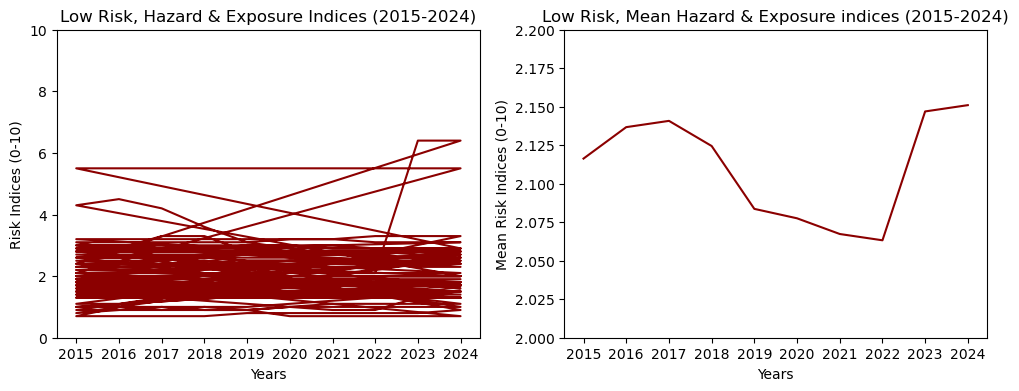

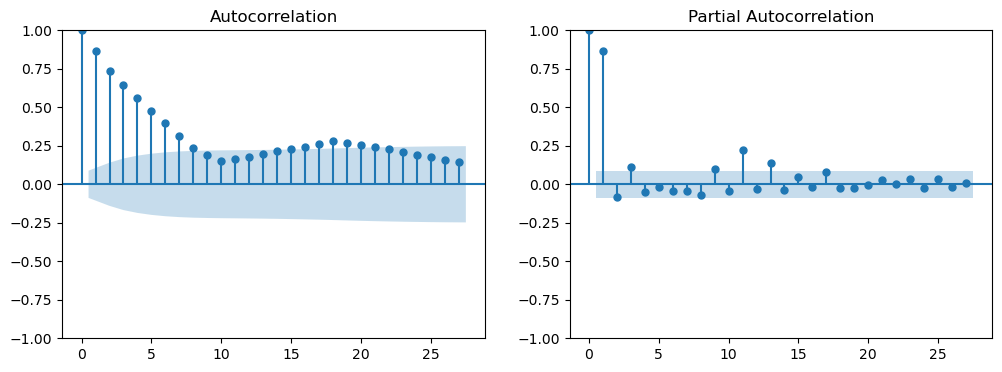

C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Use

                                  SARIMAX Results                                  
Dep. Variable:     Hazard & Exposure Index   No. Observations:                  490
Model:                      ARIMA(1, 1, 1)   Log Likelihood                -291.292
Date:                     Mon, 08 Apr 2024   AIC                            588.583
Time:                             03:54:48   BIC                            601.160
Sample:                                  0   HQIC                           593.523
                                     - 490                                         
Covariance Type:                       opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8590      0.034    -25.280      0.000      -0.926      -0.792
ma.L1          0.9842      0.010     96.079      0.000       0.964       1.004
sigma2      

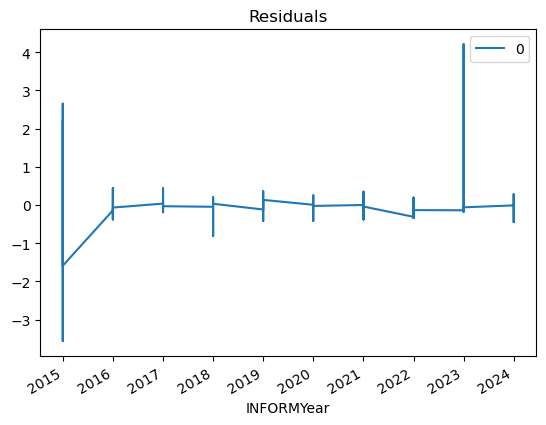

C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


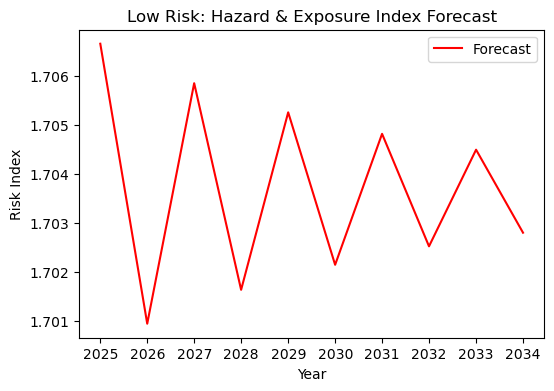

Mean Squared Error (MSE): 0.0054238845169744315
Mean Absolute Error (MAE): 0.05371051640434208
Root Mean Squared Error (RMSE): 0.07364702653179171


C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [142]:
# Visualize the time series data - Figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
# Plot 1:
#axes[0].grid(True)
axes[0].set_xlabel('Years')
axes[0].set_ylabel('Risk Indices (0-10)')
axes[0].plot(df_low['Hazard & Exposure Index'], color = 'darkred')
axes[0].set_title("Low Risk, Hazard & Exposure Indices (2015-2024)")
axes[0].set_ylim([0, 10])

# Plot 2:
#axes[1].grid(True)
axes[1].set_xlabel('Years')
axes[1].set_ylabel('Mean Risk Indices (0-10)')
axes[1].plot(df_low.groupby('INFORMYear')['Hazard & Exposure Index'].mean(), color = 'darkred')
axes[1].set_title("Low Risk, Mean Hazard & Exposure indices (2015-2024)")
axes[1].set_ylim([2, 2.2])

# Check autocorrelation and partial autocorrelation
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(df_low['Hazard & Exposure Index'], ax=ax[0])
plot_pacf(df_low['Hazard & Exposure Index'], ax=ax[1])
plt.show()

# Fit ARIMA model
order = (1, 1, 1)  # Example order (p, d, q)
model = ARIMA(df_low['Hazard & Exposure Index'], order=order)
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Plot residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(title='Residuals')
plt.show()

# Get the last date in the dataset
last_date = df_low.index[-1]

# Calculate the start date for forecasting (first day of the following year)
start_date_forecast = last_date + DateOffset(years=0)

# Plot forecast
forecast_steps = 10  # Example number of forecast steps (for one year)
forecast_dates = pd.date_range(start=start_date_forecast, periods=forecast_steps, freq='Y')  # Start from the first day of the following year
forecast = model_fit.forecast(steps=forecast_steps)

plt.figure(figsize=(6, 4))
plt.plot(forecast_dates, forecast, color='red', label='Forecast')
plt.title('Low Risk: Hazard & Exposure Index Forecast')
plt.xlabel('Year')
plt.ylabel('Risk Index')
plt.legend()
plt.show()

# Evaluate the model
# Make sure to have the actual values available for comparison
actual_values = df_low['Hazard & Exposure Index'].iloc[-forecast_steps:]  # Actual values for the forecast period

# Calculate predictions
forecast_values = model_fit.forecast(steps=forecast_steps)

# Calculate performance metrics
mse = mean_squared_error(actual_values, forecast_values)
mae = mean_absolute_error(actual_values, forecast_values)
rmse = np.sqrt(mse)

# Print performance metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

#### Hazard & Exposure Index - Medium INFORM Risk

C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Use

                                  SARIMAX Results                                  
Dep. Variable:     Hazard & Exposure Index   No. Observations:                  670
Model:                      ARIMA(1, 1, 1)   Log Likelihood                -869.607
Date:                     Mon, 08 Apr 2024   AIC                           1745.213
Time:                             04:07:43   BIC                           1758.731
Sample:                                  0   HQIC                          1750.449
                                     - 670                                         
Covariance Type:                       opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7950      0.021     38.299      0.000       0.754       0.836
ma.L1         -0.9936      0.007   -144.158      0.000      -1.007      -0.980
sigma2      

C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


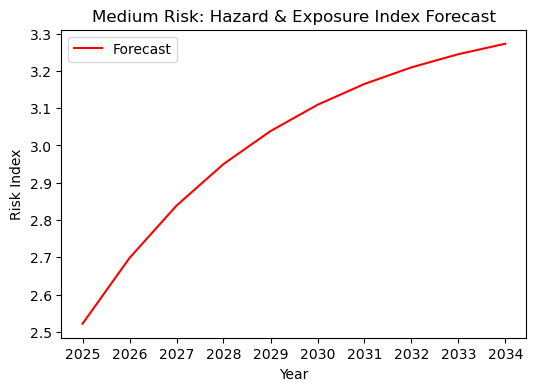

Mean Squared Error (MSE): 0.5499464852573603
Mean Absolute Error (MAE): 0.7147981896867188
Root Mean Squared Error (RMSE): 0.7415837681997633


C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [155]:
# Visualize the time series data - Figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
# Plot 1:
#axes[0].grid(True)
axes[0].set_xlabel('Years')
axes[0].set_ylabel('Risk Indices (0-10)')
axes[0].plot(df_med['Hazard & Exposure Index'], color = 'darkred')
axes[0].set_title("Medium Risk, Hazard & Exposure Indices (2015-2024)")
axes[0].set_ylim([0, 10])

# Plot 2:
#axes[1].grid(True)
axes[1].set_xlabel('Years')
axes[1].set_ylabel('Mean Risk Indices (0-10)')
axes[1].plot(df_med.groupby('INFORMYear')['Hazard & Exposure Index'].mean(), color = 'darkred')
axes[1].set_title("Medium Risk, Mean Hazard & Exposure indices (2015-2024)")
axes[1].set_ylim([3, 3.3])

# Check autocorrelation and partial autocorrelation
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(df_med['Hazard & Exposure Index'], ax=ax[0])
plot_pacf(df_med['Hazard & Exposure Index'], ax=ax[1])
plt.show()

# Fit ARIMA model
order = (1, 1, 1)  # Example order (p, d, q)
model = ARIMA(df_med['Hazard & Exposure Index'], order=order)
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Plot residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(title='Residuals')
plt.show()

# Get the last date in the dataset
last_date = df_med.index[-1]

# Calculate the start date for forecasting (first day of the following year)
start_date_forecast = last_date + DateOffset(years=0)

# Plot forecast
forecast_steps = 10  # Example number of forecast steps (for one year)
forecast_dates = pd.date_range(start=start_date_forecast, periods=forecast_steps, freq='Y')  # Start from the first day of the following year
forecast = model_fit.forecast(steps=forecast_steps)

plt.figure(figsize=(6, 4))
plt.plot(forecast_dates, forecast, color='red', label='Forecast')
plt.title('Medium Risk: Hazard & Exposure Index Forecast')
plt.xlabel('Year')
plt.ylabel('Risk Index')
plt.legend()
plt.show()

# Evaluate the model
# Make sure to have the actual values available for comparison
actual_values = df_med['Hazard & Exposure Index'].iloc[-forecast_steps:]  # Actual values for the forecast period

# Calculate predictions
forecast_values = model_fit.forecast(steps=forecast_steps)

# Calculate performance metrics
mse = mean_squared_error(actual_values, forecast_values)
mae = mean_absolute_error(actual_values, forecast_values)
rmse = np.sqrt(mse)

# Print performance metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

#### Hazard & Exposure Index - High INFORM Risk

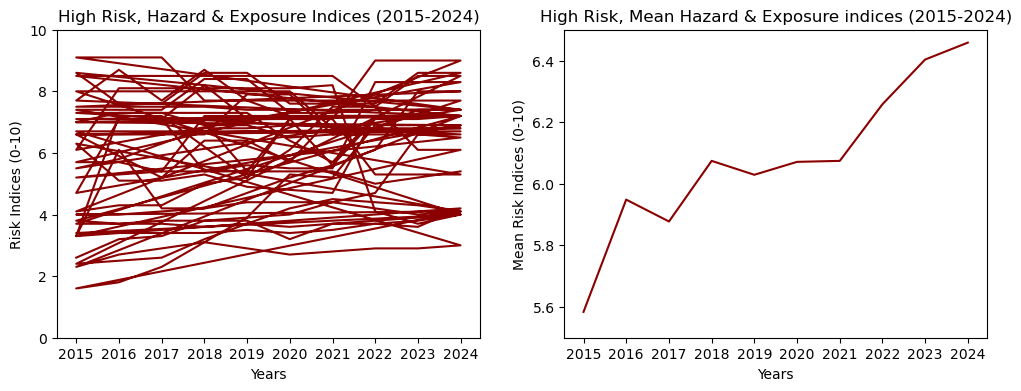

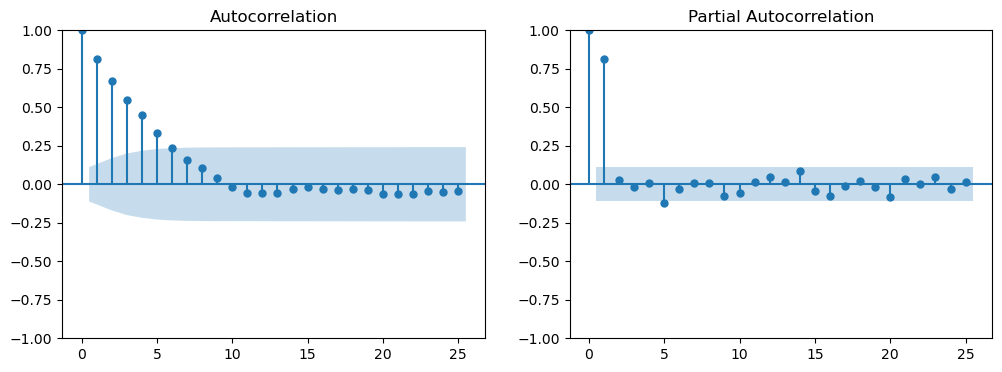

C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Use

                                  SARIMAX Results                                  
Dep. Variable:     Hazard & Exposure Index   No. Observations:                  310
Model:                      ARIMA(1, 1, 1)   Log Likelihood                -445.771
Date:                     Mon, 08 Apr 2024   AIC                            897.543
Time:                             04:04:27   BIC                            908.743
Sample:                                  0   HQIC                           902.021
                                     - 310                                         
Covariance Type:                       opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8114      0.057     14.253      0.000       0.700       0.923
ma.L1         -0.9861      0.014    -72.257      0.000      -1.013      -0.959
sigma2      

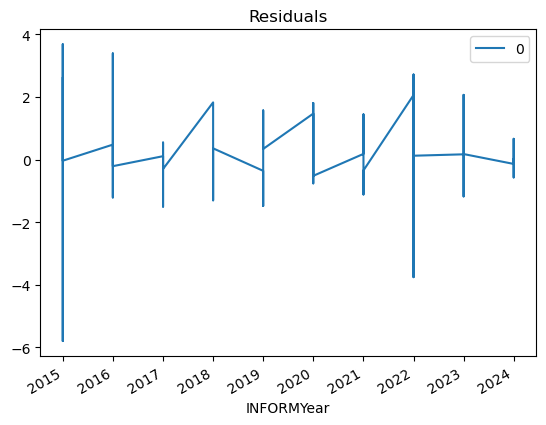

C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


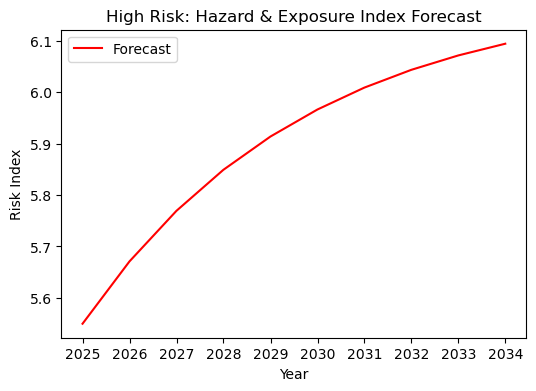

Mean Squared Error (MSE): 0.9997580409036935
Mean Absolute Error (MAE): 0.9460648697163029
Root Mean Squared Error (RMSE): 0.9998790131329357


C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [151]:
# Visualize the time series data - Figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
# Plot 1:
#axes[0].grid(True)
axes[0].set_xlabel('Years')
axes[0].set_ylabel('Risk Indices (0-10)')
axes[0].plot(df_high['Hazard & Exposure Index'], color = 'darkred')
axes[0].set_title("High Risk, Hazard & Exposure Indices (2015-2024)")
axes[0].set_ylim([0, 10])

# Plot 2:
#axes[1].grid(True)
axes[1].set_xlabel('Years')
axes[1].set_ylabel('Mean Risk Indices (0-10)')
axes[1].plot(df_high.groupby('INFORMYear')['Hazard & Exposure Index'].mean(), color = 'darkred')
axes[1].set_title("High Risk, Mean Hazard & Exposure indices (2015-2024)")
axes[1].set_ylim([5.5,6.5])

# Check autocorrelation and partial autocorrelation
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(df_high['Hazard & Exposure Index'], ax=ax[0])
plot_pacf(df_high['Hazard & Exposure Index'], ax=ax[1])
plt.show()

# Fit ARIMA model
order = (1, 1, 1)  # Example order (p, d, q)
model = ARIMA(df_high['Hazard & Exposure Index'], order=order)
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Plot residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(title='Residuals')
plt.show()

# Get the last date in the dataset
last_date = df_low.index[-1]

# Calculate the start date for forecasting (first day of the following year)
start_date_forecast = last_date + DateOffset(years=0)

# Plot forecast
forecast_steps = 10  # Example number of forecast steps (for one year)
forecast_dates = pd.date_range(start=start_date_forecast, periods=forecast_steps, freq='Y')  # Start from the first day of the following year
forecast = model_fit.forecast(steps=forecast_steps)

plt.figure(figsize=(6, 4))
plt.plot(forecast_dates, forecast, color='red', label='Forecast')
plt.title('High Risk: Hazard & Exposure Index Forecast')
plt.xlabel('Year')
plt.ylabel('Risk Index')
plt.legend()
plt.show()

# Evaluate the model
# Make sure to have the actual values available for comparison
actual_values = df_high['Hazard & Exposure Index'].iloc[-forecast_steps:]  # Actual values for the forecast period

# Calculate predictions
forecast_values = model_fit.forecast(steps=forecast_steps)

# Calculate performance metrics
mse = mean_squared_error(actual_values, forecast_values)
mae = mean_absolute_error(actual_values, forecast_values)
rmse = np.sqrt(mse)

# Print performance metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

#### Hazard & Exposure Index - Very High INFORM Risk

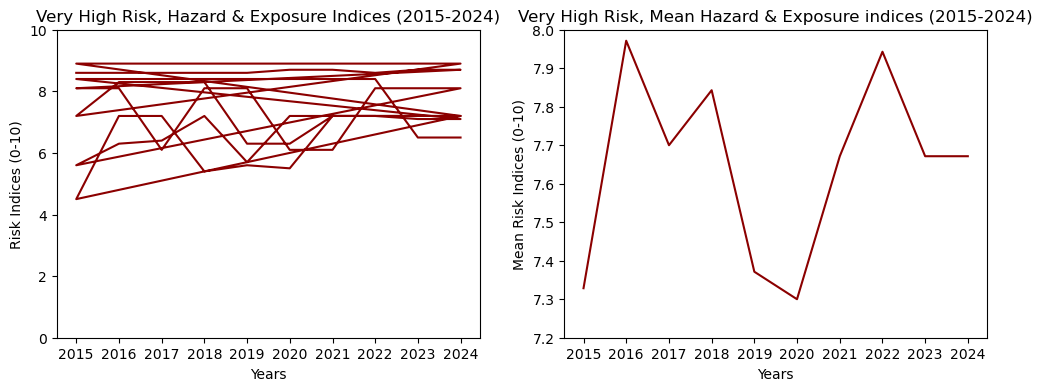

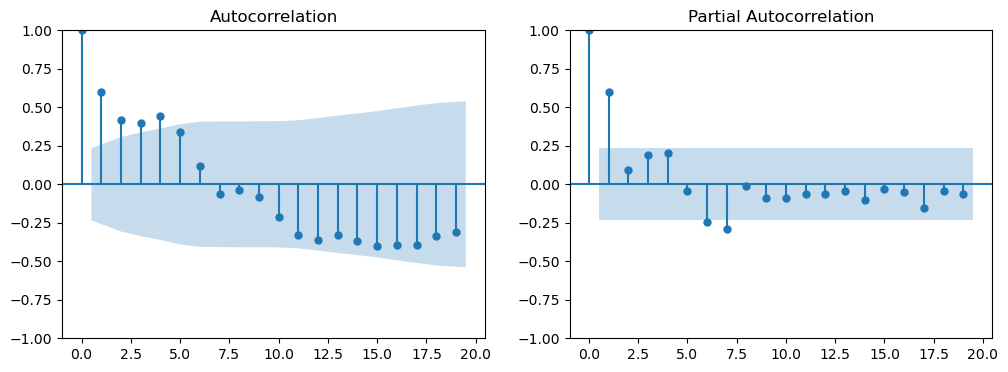

C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Use

                                  SARIMAX Results                                  
Dep. Variable:     Hazard & Exposure Index   No. Observations:                   70
Model:                      ARIMA(1, 1, 1)   Log Likelihood                 -90.340
Date:                     Mon, 08 Apr 2024   AIC                            186.679
Time:                             04:00:52   BIC                            193.382
Sample:                                  0   HQIC                           189.338
                                      - 70                                         
Covariance Type:                       opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1684      0.349      0.483      0.629      -0.515       0.852
ma.L1         -0.6062      0.294     -2.060      0.039      -1.183      -0.029
sigma2      

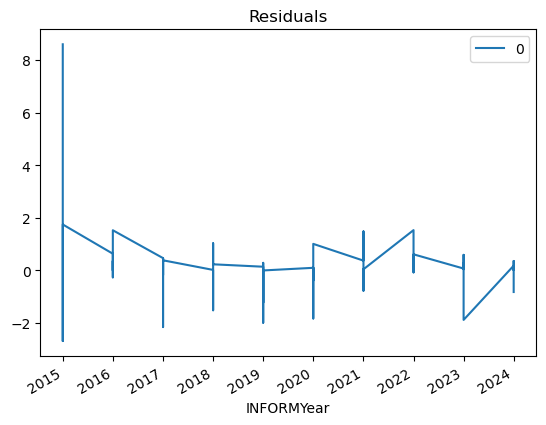

C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


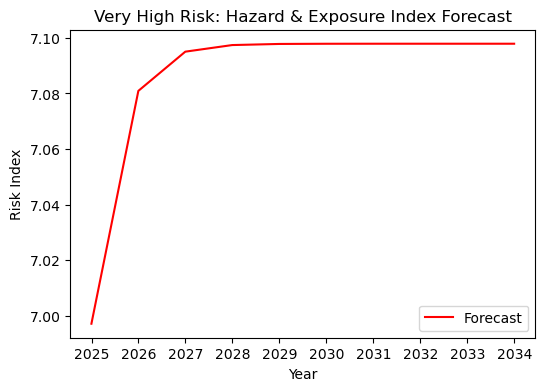

Mean Squared Error (MSE): 1.460450256613416
Mean Absolute Error (MAE): 1.1733704281047608
Root Mean Squared Error (RMSE): 1.20849090050915


C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [147]:
# Visualize the time series data - Figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
# Plot 1:
#axes[0].grid(True)
axes[0].set_xlabel('Years')
axes[0].set_ylabel('Risk Indices (0-10)')
axes[0].plot(df_vhigh['Hazard & Exposure Index'], color = 'darkred')
axes[0].set_title("Very High Risk, Hazard & Exposure Indices (2015-2024)")
axes[0].set_ylim([0, 10])

# Plot 2:
#axes[1].grid(True)
axes[1].set_xlabel('Years')
axes[1].set_ylabel('Mean Risk Indices (0-10)')
axes[1].plot(df_vhigh.groupby('INFORMYear')['Hazard & Exposure Index'].mean(), color = 'darkred')
axes[1].set_title("Very High Risk, Mean Hazard & Exposure indices (2015-2024)")
axes[1].set_ylim([7.2, 8])

# Check autocorrelation and partial autocorrelation
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(df_vhigh['Hazard & Exposure Index'], ax=ax[0])
plot_pacf(df_vhigh['Hazard & Exposure Index'], ax=ax[1])
plt.show()

# Fit ARIMA model
order = (1, 1, 1)  # Example order (p, d, q)
model = ARIMA(df_vhigh['Hazard & Exposure Index'], order=order)
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Plot residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(title='Residuals')
plt.show()

# Get the last date in the dataset
last_date = df_vhigh.index[-1]

# Calculate the start date for forecasting (first day of the following year)
start_date_forecast = last_date + DateOffset(years=0)

# Plot forecast
forecast_steps = 10  # Example number of forecast steps (for one year)
forecast_dates = pd.date_range(start=start_date_forecast, periods=forecast_steps, freq='Y')  # Start from the first day of the following year
forecast = model_fit.forecast(steps=forecast_steps)

plt.figure(figsize=(6, 4))
plt.plot(forecast_dates, forecast, color='red', label='Forecast')
plt.title('Very High Risk: Hazard & Exposure Index Forecast')
plt.xlabel('Year')
plt.ylabel('Risk Index')
plt.legend()
plt.show()

# Evaluate the model
# Make sure to have the actual values available for comparison
actual_values = df_vhigh['Hazard & Exposure Index'].iloc[-forecast_steps:]  # Actual values for the forecast period

# Calculate predictions
forecast_values = model_fit.forecast(steps=forecast_steps)

# Calculate performance metrics
mse = mean_squared_error(actual_values, forecast_values)
mae = mean_absolute_error(actual_values, forecast_values)
rmse = np.sqrt(mse)

# Print performance metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

### Lack of Coping Capacity Index

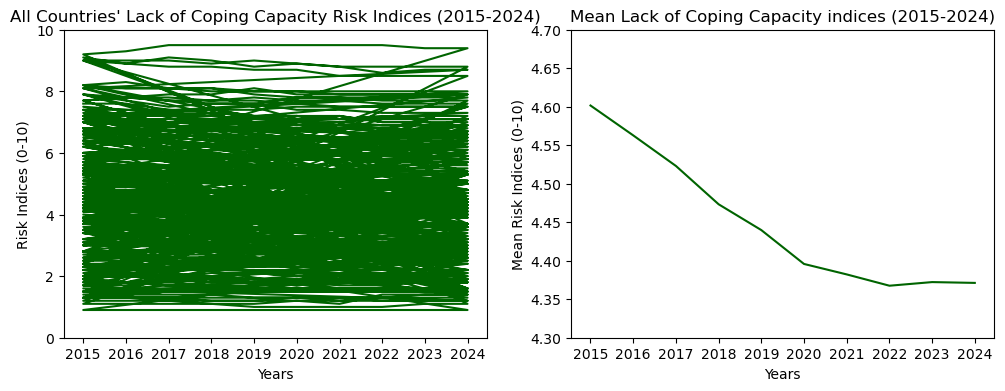

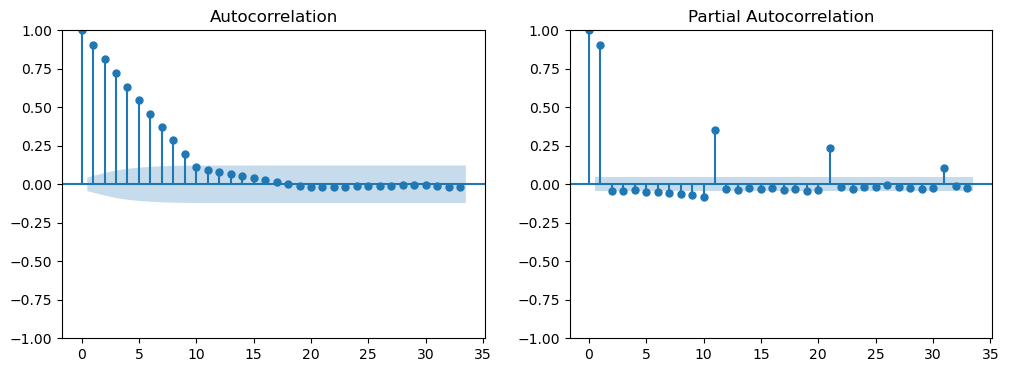

C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Use

                                     SARIMAX Results                                     
Dep. Variable:     Lack of Coping Capacity Index   No. Observations:                 1910
Model:                            ARIMA(1, 1, 1)   Log Likelihood               -2349.559
Date:                           Mon, 08 Apr 2024   AIC                           4705.118
Time:                                   03:06:58   BIC                           4721.781
Sample:                                        0   HQIC                          4711.251
                                          - 1910                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0014     37.000  -3.68e-05      1.000     -72.520      72.517
ma.L1         -0.0016     36.999  -4.33e-05

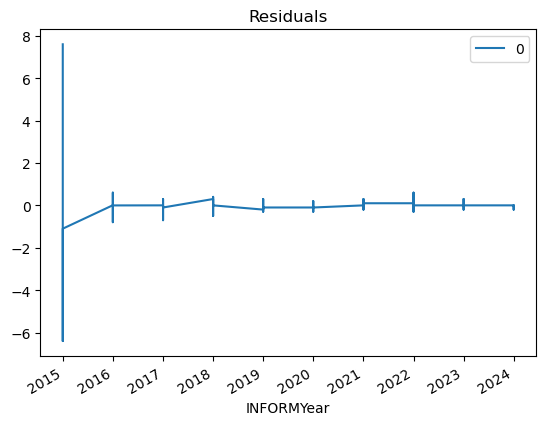

C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


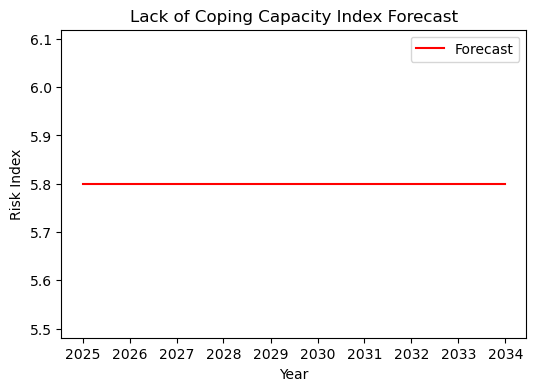

Mean Squared Error (MSE): 0.0010000000000000106
Mean Absolute Error (MAE): 0.010000000000000054
Root Mean Squared Error (RMSE): 0.031622776601683965


C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [112]:
# Visualize the time series data - Figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
# Plot 1:
#axes[0].grid(True)
axes[0].set_xlabel('Years')
axes[0].set_ylabel('Risk Indices (0-10)')
axes[0].plot(df['Lack of Coping Capacity Index'], color = 'darkgreen')
axes[0].set_title("All Countries' Lack of Coping Capacity Risk Indices (2015-2024)")
axes[0].set_ylim([0, 10])

# Plot 2:
#axes[1].grid(True)
axes[1].set_xlabel('Years')
axes[1].set_ylabel('Mean Risk Indices (0-10)')
axes[1].plot(df.groupby('INFORMYear')['Lack of Coping Capacity Index'].mean(), color = 'darkgreen')
axes[1].set_title("Mean Lack of Coping Capacity indices (2015-2024)")
axes[1].set_ylim([4.3, 4.7])

# Check autocorrelation and partial autocorrelation
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(df['Lack of Coping Capacity Index'], ax=ax[0])
plot_pacf(df['Lack of Coping Capacity Index'], ax=ax[1])
plt.show()

# Fit ARIMA model
order = (1, 1, 1)  # Example order (p, d, q)
model = ARIMA(df['Lack of Coping Capacity Index'], order=order)
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Plot residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(title='Residuals')
plt.show()

# Get the last date in the dataset
last_date = df.index[-1]

# Calculate the start date for forecasting (first day of the following year)
start_date_forecast = last_date + DateOffset(years=0)

# Plot forecast
forecast_steps = 10  # Example number of forecast steps (for one year)
forecast_dates = pd.date_range(start=start_date_forecast, periods=forecast_steps, freq='Y')  # Start from the first day of the following year
forecast = model_fit.forecast(steps=forecast_steps)

plt.figure(figsize=(6, 4))
plt.plot(forecast_dates, forecast, color='red', label='Forecast')
plt.title('Lack of Coping Capacity Index Forecast')
plt.xlabel('Year')
plt.ylabel('Risk Index')
plt.legend()
plt.show()

# Evaluate the model
# Make sure to have the actual values available for comparison
actual_values = df['Lack of Coping Capacity Index'].iloc[-forecast_steps:]  # Actual values for the forecast period

# Calculate predictions
forecast_values = model_fit.forecast(steps=forecast_steps)

# Calculate performance metrics
mse = mean_squared_error(actual_values, forecast_values)
mae = mean_absolute_error(actual_values, forecast_values)
rmse = np.sqrt(mse)

# Print performance metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

#### Very Low Risk, Lack of Coping Capacity Index

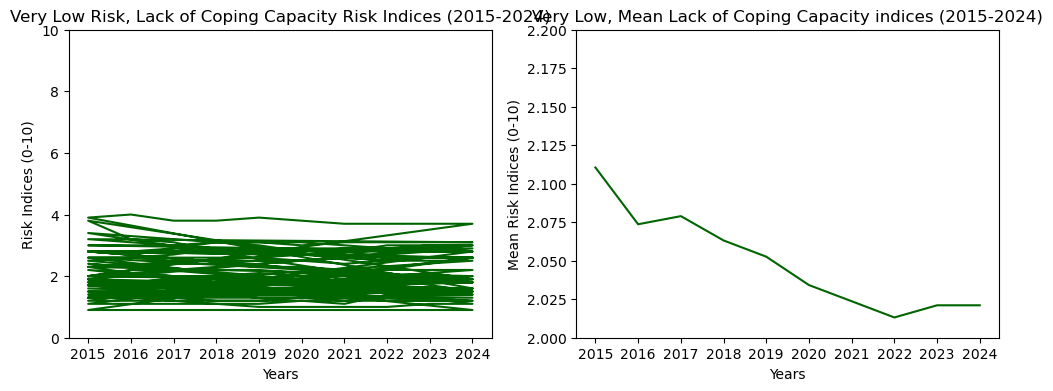

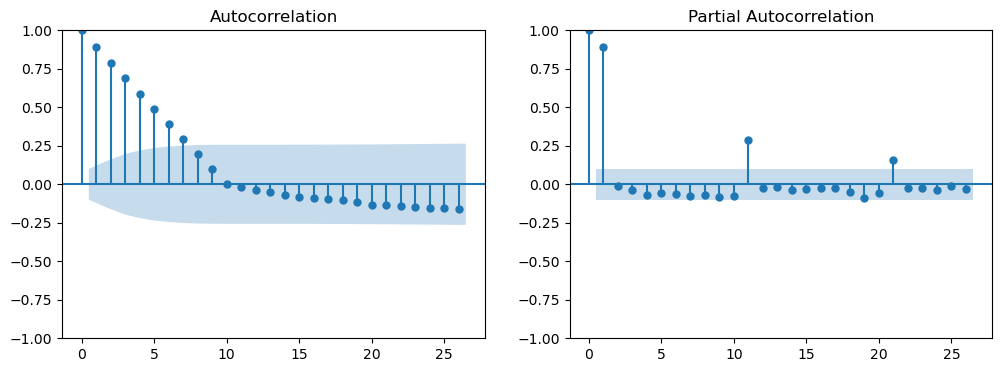

C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Use

                                     SARIMAX Results                                     
Dep. Variable:     Lack of Coping Capacity Index   No. Observations:                  380
Model:                            ARIMA(1, 1, 1)   Log Likelihood                -109.645
Date:                           Mon, 08 Apr 2024   AIC                            225.289
Time:                                   04:12:57   BIC                            237.102
Sample:                                        0   HQIC                           229.977
                                           - 380                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2271      2.833      0.080      0.936      -5.326       5.780
ma.L1         -0.2742      2.823     -0.097

C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


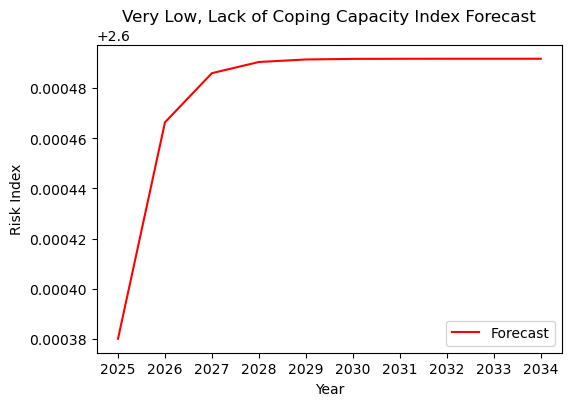

Mean Squared Error (MSE): 0.02188798625536835
Mean Absolute Error (MAE): 0.11981774778535566
Root Mean Squared Error (RMSE): 0.14794588961971317


C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [158]:
# Visualize the time series data - Figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
# Plot 1:
#axes[0].grid(True)
axes[0].set_xlabel('Years')
axes[0].set_ylabel('Risk Indices (0-10)')
axes[0].plot(df_vlow['Lack of Coping Capacity Index'], color = 'darkgreen')
axes[0].set_title("Very Low Risk, Lack of Coping Capacity Risk Indices (2015-2024)")
axes[0].set_ylim([0, 10])

# Plot 2:
#axes[1].grid(True)
axes[1].set_xlabel('Years')
axes[1].set_ylabel('Mean Risk Indices (0-10)')
axes[1].plot(df_vlow.groupby('INFORMYear')['Lack of Coping Capacity Index'].mean(), color = 'darkgreen')
axes[1].set_title("Very Low, Mean Lack of Coping Capacity indices (2015-2024)")
axes[1].set_ylim([2, 2.2])

# Check autocorrelation and partial autocorrelation
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(df_vlow['Lack of Coping Capacity Index'], ax=ax[0])
plot_pacf(df_vlow['Lack of Coping Capacity Index'], ax=ax[1])
plt.show()

# Fit ARIMA model
order = (1, 1, 1)  # Example order (p, d, q)
model = ARIMA(df_vlow['Lack of Coping Capacity Index'], order=order)
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Plot residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(title='Residuals')
plt.show()

# Get the last date in the dataset
last_date = df_vlow.index[-1]

# Calculate the start date for forecasting (first day of the following year)
start_date_forecast = last_date + DateOffset(years=0)

# Plot forecast
forecast_steps = 10  # Example number of forecast steps (for one year)
forecast_dates = pd.date_range(start=start_date_forecast, periods=forecast_steps, freq='Y')  # Start from the first day of the following year
forecast = model_fit.forecast(steps=forecast_steps)

plt.figure(figsize=(6, 4))
plt.plot(forecast_dates, forecast, color='red', label='Forecast')
plt.title('Very Low, Lack of Coping Capacity Index Forecast')
plt.xlabel('Year')
plt.ylabel('Risk Index')
plt.legend()
plt.show()

# Evaluate the model
# Make sure to have the actual values available for comparison
actual_values = df_vlow['Lack of Coping Capacity Index'].iloc[-forecast_steps:]  # Actual values for the forecast period

# Calculate predictions
forecast_values = model_fit.forecast(steps=forecast_steps)

# Calculate performance metrics
mse = mean_squared_error(actual_values, forecast_values)
mae = mean_absolute_error(actual_values, forecast_values)
rmse = np.sqrt(mse)

# Print performance metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

#### Low Risk, Lack of Coping Capacity Index

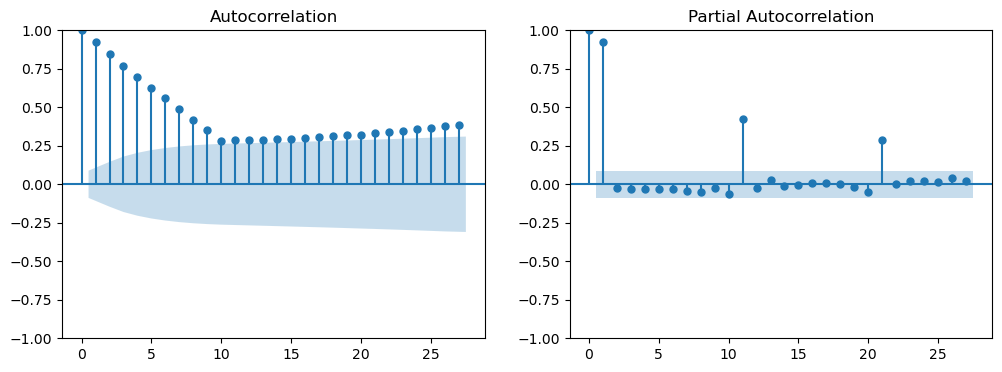

C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Use

                                     SARIMAX Results                                     
Dep. Variable:     Lack of Coping Capacity Index   No. Observations:                  490
Model:                            ARIMA(1, 1, 1)   Log Likelihood                -250.870
Date:                           Tue, 09 Apr 2024   AIC                            507.741
Time:                                   00:12:24   BIC                            520.318
Sample:                                        0   HQIC                           512.681
                                           - 490                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8909      0.044     20.217      0.000       0.805       0.977
ma.L1         -0.9846      0.012    -85.518

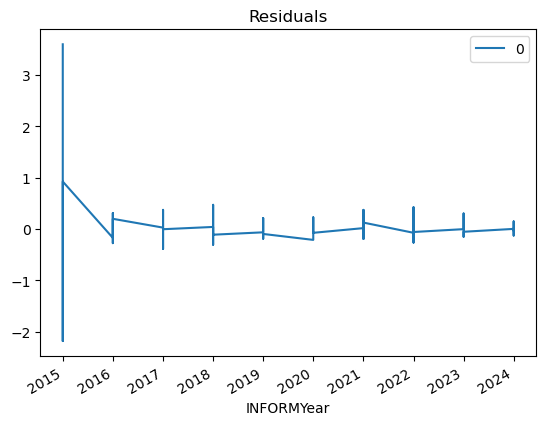

C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


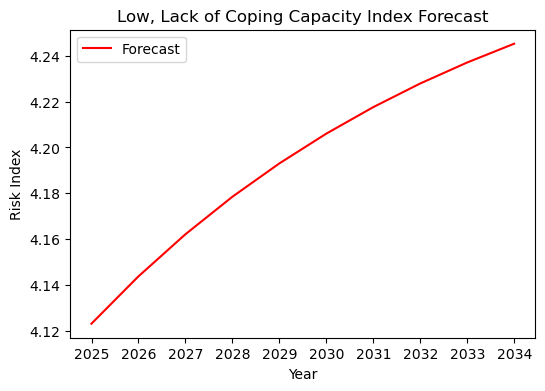

Mean Squared Error (MSE): 0.018059835212866686
Mean Absolute Error (MAE): 0.12145136003107489
Root Mean Squared Error (RMSE): 0.1343868863128642


C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [13]:
# Visualize the time series data - Figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
# Plot 1:
#axes[0].grid(True)
axes[0].set_xlabel('Years')
axes[0].set_ylabel('Risk Indices (0-10)')
axes[0].plot(df_low['Lack of Coping Capacity Index'], color = 'darkgreen')
axes[0].set_title("Low Risk, Lack of Coping Capacity Risk Indices (2015-2024)")
axes[0].set_ylim([0, 10])

# Plot 2:
#axes[1].grid(True)
axes[1].set_xlabel('Years')
axes[1].set_ylabel('Mean Risk Indices (0-10)')
axes[1].plot(df_low.groupby('INFORMYear')['Lack of Coping Capacity Index'].mean(), color = 'darkgreen')
axes[1].set_title("Low Risk, Mean Lack of Coping Capacity indices (2015-2024)")
axes[1].set_ylim([2, 4])

# Check autocorrelation and partial autocorrelation
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(df_low['Lack of Coping Capacity Index'], ax=ax[0])
plot_pacf(df_low['Lack of Coping Capacity Index'], ax=ax[1])
plt.show()

# Fit ARIMA model
order = (1, 1, 1)  # Example order (p, d, q)
model = ARIMA(df_low['Lack of Coping Capacity Index'], order=order)
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Plot residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(title='Residuals')
plt.show()

# Get the last date in the dataset
last_date = df_low.index[-1]

# Calculate the start date for forecasting (first day of the following year)
start_date_forecast = last_date + DateOffset(years=0)

# Plot forecast
forecast_steps = 10  # Example number of forecast steps (for one year)
forecast_dates = pd.date_range(start=start_date_forecast, periods=forecast_steps, freq='Y')  # Start from the first day of the following year
forecast = model_fit.forecast(steps=forecast_steps)

plt.figure(figsize=(6, 4))
plt.plot(forecast_dates, forecast, color='red', label='Forecast')
plt.title('Low, Lack of Coping Capacity Index Forecast')
plt.xlabel('Year')
plt.ylabel('Risk Index')
plt.legend()
plt.show()

# Evaluate the model
# Make sure to have the actual values available for comparison
actual_values = df_low['Lack of Coping Capacity Index'].iloc[-forecast_steps:]  # Actual values for the forecast period

# Calculate predictions
forecast_values = model_fit.forecast(steps=forecast_steps)

# Calculate performance metrics
mse = mean_squared_error(actual_values, forecast_values)
mae = mean_absolute_error(actual_values, forecast_values)
rmse = np.sqrt(mse)

# Print performance metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

#### Medium Risk, Lack of Coping Capacity Index

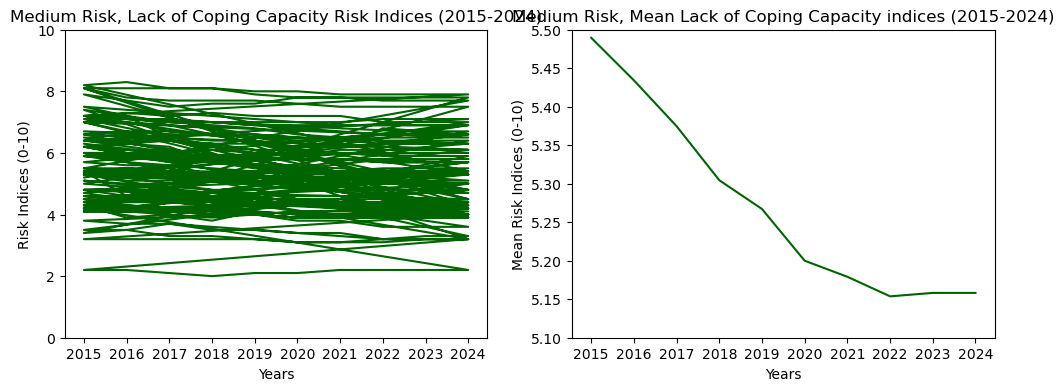

C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Use

                                     SARIMAX Results                                     
Dep. Variable:     Lack of Coping Capacity Index   No. Observations:                  670
Model:                            ARIMA(1, 1, 1)   Log Likelihood                -579.502
Date:                           Mon, 08 Apr 2024   AIC                           1165.005
Time:                                   04:25:06   BIC                           1178.522
Sample:                                        0   HQIC                          1170.241
                                           - 670                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8941      0.031     29.019      0.000       0.834       0.954
ma.L1         -1.0000      0.462     -2.167

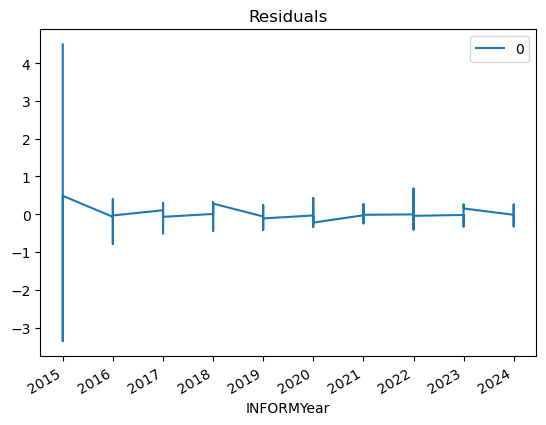

C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Mean Squared Error (MSE): 0.06385586356543467
Mean Absolute Error (MAE): 0.23913521617474282
Root Mean Squared Error (RMSE): 0.252697177596891


C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [165]:
# Visualize the time series data - Figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
# Plot 1:
#axes[0].grid(True)
axes[0].set_xlabel('Years')
axes[0].set_ylabel('Risk Indices (0-10)')
axes[0].plot(df_med['Lack of Coping Capacity Index'], color = 'darkgreen')
axes[0].set_title("Medium Risk, Lack of Coping Capacity Risk Indices (2015-2024)")
axes[0].set_ylim([0, 10])

# Plot 2:
#axes[1].grid(True)
axes[1].set_xlabel('Years')
axes[1].set_ylabel('Mean Risk Indices (0-10)')
axes[1].plot(df_med.groupby('INFORMYear')['Lack of Coping Capacity Index'].mean(), color = 'darkgreen')
axes[1].set_title("Medium Risk, Mean Lack of Coping Capacity indices (2015-2024)")
axes[1].set_ylim([5.1, 5.5])

# Check autocorrelation and partial autocorrelation
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(df_med['Lack of Coping Capacity Index'], ax=ax[0])
plot_pacf(df_med['Lack of Coping Capacity Index'], ax=ax[1])
plt.show()

# Fit ARIMA model
order = (1, 1, 1)  # Example order (p, d, q)
model = ARIMA(df_med['Lack of Coping Capacity Index'], order=order)
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Plot residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(title='Residuals')
plt.show()

# Get the last date in the dataset
last_date = df_med.index[-1]

# Calculate the start date for forecasting (first day of the following year)
start_date_forecast = last_date + DateOffset(years=0)

# Plot forecast
forecast_steps = 10  # Example number of forecast steps (for one year)
forecast_dates = pd.date_range(start=start_date_forecast, periods=forecast_steps, freq='Y')  # Start from the first day of the following year
forecast = model_fit.forecast(steps=forecast_steps)

plt.figure(figsize=(6, 4))
plt.plot(forecast_dates, forecast, color='red', label='Forecast')
plt.title('Medium Risk, Lack of Coping Capacity Index Forecast')
plt.xlabel('Year')
plt.ylabel('Risk Index')
plt.legend()
plt.show()

# Evaluate the model
# Make sure to have the actual values available for comparison
actual_values = df_med['Lack of Coping Capacity Index'].iloc[-forecast_steps:]  # Actual values for the forecast period

# Calculate predictions
forecast_values = model_fit.forecast(steps=forecast_steps)

# Calculate performance metrics
mse = mean_squared_error(actual_values, forecast_values)
mae = mean_absolute_error(actual_values, forecast_values)
rmse = np.sqrt(mse)

# Print performance metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

#### High Risk, Lack of Coping Capacity Index

C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Use

                                     SARIMAX Results                                     
Dep. Variable:     Lack of Coping Capacity Index   No. Observations:                  310
Model:                            ARIMA(1, 1, 1)   Log Likelihood                -247.462
Date:                           Mon, 08 Apr 2024   AIC                            500.924
Time:                                   04:28:24   BIC                            512.124
Sample:                                        0   HQIC                           505.401
                                           - 310                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1380      8.637      0.016      0.987     -16.790      17.066
ma.L1         -0.1672      8.626     -0.019

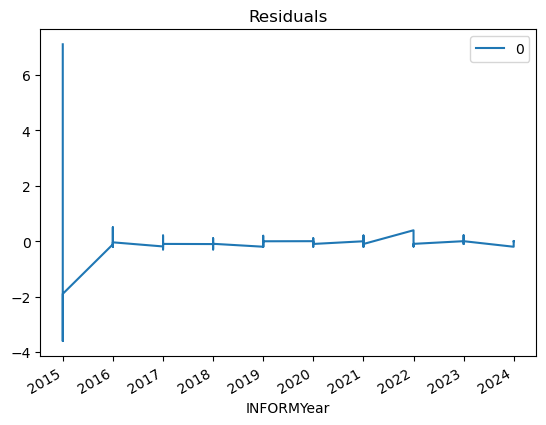

C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


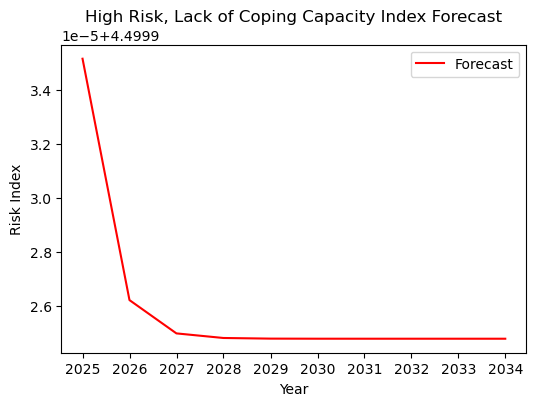

Mean Squared Error (MSE): 0.09702738443573523
Mean Absolute Error (MAE): 0.21005897588719077
Root Mean Squared Error (RMSE): 0.31149219000760714


C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [168]:
# Visualize the time series data - Figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
# Plot 1:
#axes[0].grid(True)
axes[0].set_xlabel('Years')
axes[0].set_ylabel('Risk Indices (0-10)')
axes[0].plot(df_high['Lack of Coping Capacity Index'], color = 'darkgreen')
axes[0].set_title("High Risk, Lack of Coping Capacity Risk Indices (2015-2024)")
axes[0].set_ylim([0, 10])

# Plot 2:
#axes[1].grid(True)
axes[1].set_xlabel('Years')
axes[1].set_ylabel('Mean Risk Indices (0-10)')
axes[1].plot(df_high.groupby('INFORMYear')['Lack of Coping Capacity Index'].mean(), color = 'darkgreen')
axes[1].set_title("High Risk, Mean Lack of Coping Capacity indices (2015-2024)")
axes[1].set_ylim([5.9, 6.2])

# Check autocorrelation and partial autocorrelation
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(df_high['Lack of Coping Capacity Index'], ax=ax[0])
plot_pacf(df_high['Lack of Coping Capacity Index'], ax=ax[1])
plt.show()

# Fit ARIMA model
order = (1, 1, 1)  # Example order (p, d, q)
model = ARIMA(df_high['Lack of Coping Capacity Index'], order=order)
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Plot residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(title='Residuals')
plt.show()

# Get the last date in the dataset
last_date = df_high.index[-1]

# Calculate the start date for forecasting (first day of the following year)
start_date_forecast = last_date + DateOffset(years=0)

# Plot forecast
forecast_steps = 10  # Example number of forecast steps (for one year)
forecast_dates = pd.date_range(start=start_date_forecast, periods=forecast_steps, freq='Y')  # Start from the first day of the following year
forecast = model_fit.forecast(steps=forecast_steps)

plt.figure(figsize=(6, 4))
plt.plot(forecast_dates, forecast, color='red', label='Forecast')
plt.title('High Risk, Lack of Coping Capacity Index Forecast')
plt.xlabel('Year')
plt.ylabel('Risk Index')
plt.legend()
plt.show()

# Evaluate the model
# Make sure to have the actual values available for comparison
actual_values = df_high['Lack of Coping Capacity Index'].iloc[-forecast_steps:]  # Actual values for the forecast period

# Calculate predictions
forecast_values = model_fit.forecast(steps=forecast_steps)

# Calculate performance metrics
mse = mean_squared_error(actual_values, forecast_values)
mae = mean_absolute_error(actual_values, forecast_values)
rmse = np.sqrt(mse)

# Print performance metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

#### Very High Risk, Lack of Coping Capacity Index

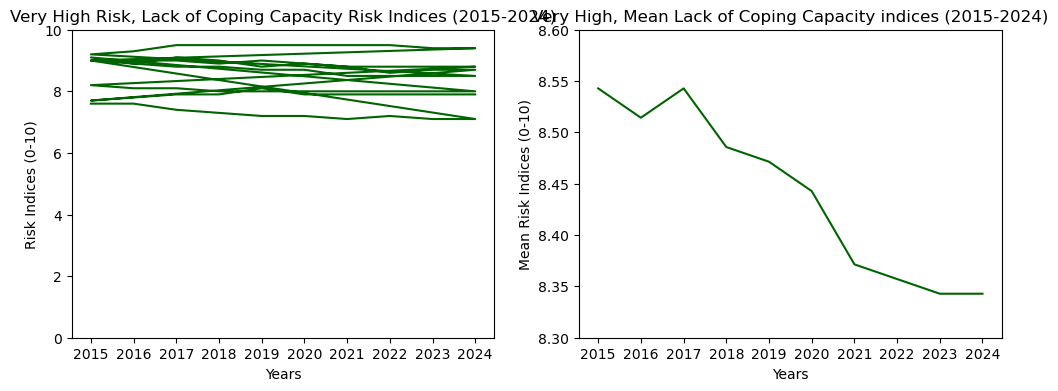

C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Use

                                     SARIMAX Results                                     
Dep. Variable:     Lack of Coping Capacity Index   No. Observations:                   70
Model:                            ARIMA(1, 1, 1)   Log Likelihood                 -20.815
Date:                           Mon, 08 Apr 2024   AIC                             47.630
Time:                                   04:31:05   BIC                             54.333
Sample:                                        0   HQIC                            50.290
                                            - 70                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1428      4.400     -0.032      0.974      -8.767       8.482
ma.L1          0.0866      4.503      0.019

C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Mean Squared Error (MSE): 0.009000015210840626
Mean Absolute Error (MAE): 0.05000048846028733
Root Mean Squared Error (RMSE): 0.09486840997318668


C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [171]:
# Visualize the time series data - Figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
# Plot 1:
#axes[0].grid(True)
axes[0].set_xlabel('Years')
axes[0].set_ylabel('Risk Indices (0-10)')
axes[0].plot(df_vhigh['Lack of Coping Capacity Index'], color = 'darkgreen')
axes[0].set_title("Very High Risk, Lack of Coping Capacity Risk Indices (2015-2024)")
axes[0].set_ylim([0, 10])

# Plot 2:
#axes[1].grid(True)
axes[1].set_xlabel('Years')
axes[1].set_ylabel('Mean Risk Indices (0-10)')
axes[1].plot(df_vhigh.groupby('INFORMYear')['Lack of Coping Capacity Index'].mean(), color = 'darkgreen')
axes[1].set_title("Very High, Mean Lack of Coping Capacity indices (2015-2024)")
axes[1].set_ylim([8.3,8.6])

# Check autocorrelation and partial autocorrelation
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(df_vhigh['Lack of Coping Capacity Index'], ax=ax[0])
plot_pacf(df_vhigh['Lack of Coping Capacity Index'], ax=ax[1])
plt.show()

# Fit ARIMA model
order = (1, 1, 1)  # Example order (p, d, q)
model = ARIMA(df_vhigh['Lack of Coping Capacity Index'], order=order)
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Plot residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(title='Residuals')
plt.show()

# Get the last date in the dataset
last_date = df_vhigh.index[-1]

# Calculate the start date for forecasting (first day of the following year)
start_date_forecast = last_date + DateOffset(years=0)

# Plot forecast
forecast_steps = 10  # Example number of forecast steps (for one year)
forecast_dates = pd.date_range(start=start_date_forecast, periods=forecast_steps, freq='Y')  # Start from the first day of the following year
forecast = model_fit.forecast(steps=forecast_steps)

plt.figure(figsize=(6, 4))
plt.plot(forecast_dates, forecast, color='red', label='Forecast')
plt.title('Very High, Lack of Coping Capacity Index Forecast')
plt.xlabel('Year')
plt.ylabel('Risk Index')
plt.legend()
plt.show()

# Evaluate the model
# Make sure to have the actual values available for comparison
actual_values = df_vhigh['Lack of Coping Capacity Index'].iloc[-forecast_steps:]  # Actual values for the forecast period

# Calculate predictions
forecast_values = model_fit.forecast(steps=forecast_steps)

# Calculate performance metrics
mse = mean_squared_error(actual_values, forecast_values)
mae = mean_absolute_error(actual_values, forecast_values)
rmse = np.sqrt(mse)

# Print performance metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

### Vulnerability Index

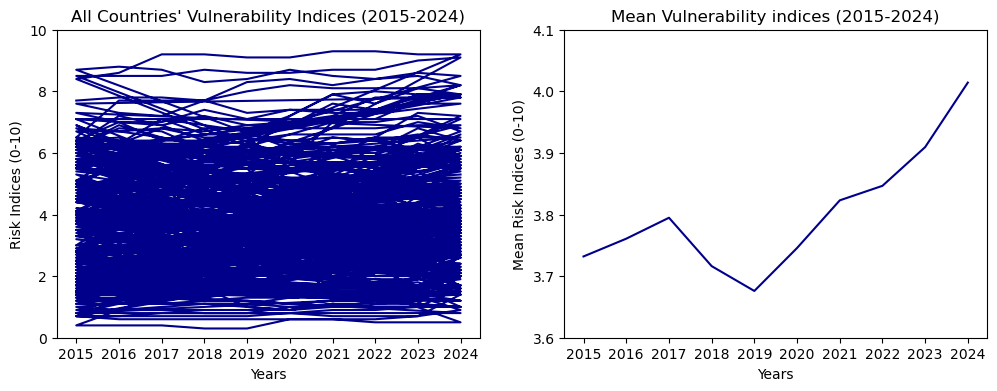

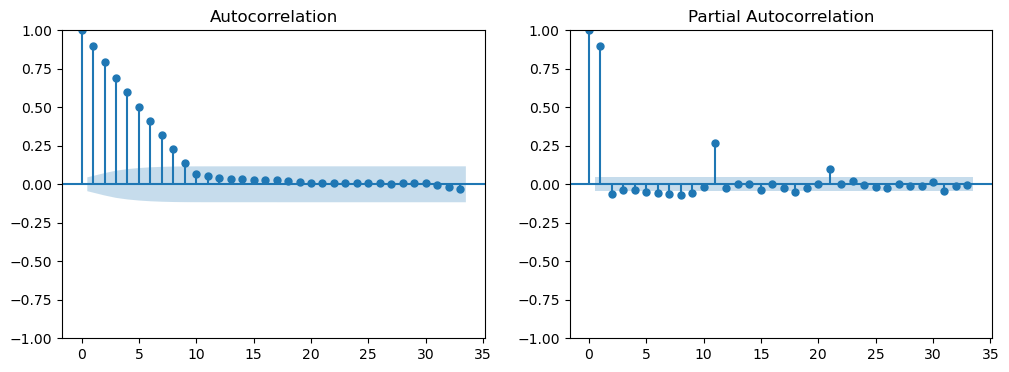

C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Use

                                SARIMAX Results                                
Dep. Variable:     Vulnerability Index   No. Observations:                 1910
Model:                  ARIMA(1, 1, 1)   Log Likelihood               -2385.124
Date:                 Mon, 08 Apr 2024   AIC                           4776.247
Time:                         03:11:51   BIC                           4792.910
Sample:                              0   HQIC                          4782.380
                                - 1910                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8996      0.014     64.481      0.000       0.872       0.927
ma.L1         -1.0000      0.169     -5.912      0.000      -1.331      -0.668
sigma2         0.7107      0.119      5.969 

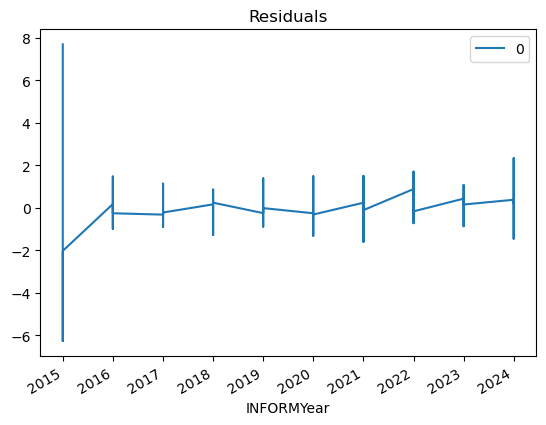

C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


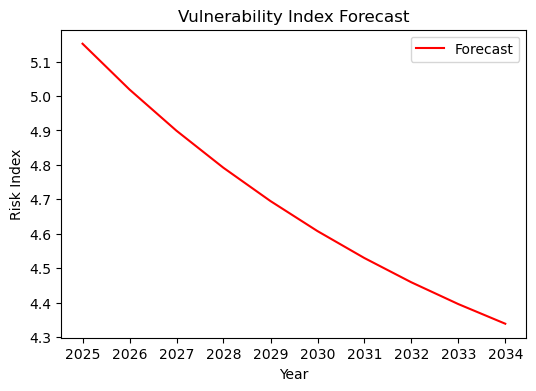

Mean Squared Error (MSE): 1.072450705808254
Mean Absolute Error (MAE): 0.9116852017083055
Root Mean Squared Error (RMSE): 1.035591959126882


C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [116]:
# Visualize the time series data - Figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
# Plot 1:
#axes[0].grid(True)
axes[0].set_xlabel('Years')
axes[0].set_ylabel('Risk Indices (0-10)')
axes[0].plot(df['Vulnerability Index'], color = 'darkblue')
axes[0].set_title("All Countries' Vulnerability Indices (2015-2024)")
axes[0].set_ylim([0, 10])

# Plot 2:
#axes[1].grid(True)
axes[1].set_xlabel('Years')
axes[1].set_ylabel('Mean Risk Indices (0-10)')
axes[1].plot(df.groupby('INFORMYear')['Vulnerability Index'].mean(), color = 'darkblue')
axes[1].set_title("Mean Vulnerability indices (2015-2024)")
axes[1].set_ylim([3.6, 4.1])

# Check autocorrelation and partial autocorrelation
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(df['Vulnerability Index'], ax=ax[0])
plot_pacf(df['Vulnerability Index'], ax=ax[1])
plt.show()

# Fit ARIMA model
order = (1, 1, 1)  # Example order (p, d, q)
model = ARIMA(df['Vulnerability Index'], order=order)
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Plot residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(title='Residuals')
plt.show()

# Get the last date in the dataset
last_date = df.index[-1]

# Calculate the start date for forecasting (first day of the following year)
start_date_forecast = last_date + DateOffset(years=0)

# Plot forecast
forecast_steps = 10  # Example number of forecast steps (for one year)
forecast_dates = pd.date_range(start=start_date_forecast, periods=forecast_steps, freq='Y')  # Start from the first day of the following year
forecast = model_fit.forecast(steps=forecast_steps)

plt.figure(figsize=(6, 4))
plt.plot(forecast_dates, forecast, color='red', label='Forecast')
plt.title('Vulnerability Index Forecast')
plt.xlabel('Year')
plt.ylabel('Risk Index')
plt.legend()
plt.show()

# Evaluate the model
# Make sure to have the actual values available for comparison
actual_values = df['Vulnerability Index'].iloc[-forecast_steps:]  # Actual values for the forecast period

# Calculate predictions
forecast_values = model_fit.forecast(steps=forecast_steps)

# Calculate performance metrics
mse = mean_squared_error(actual_values, forecast_values)
mae = mean_absolute_error(actual_values, forecast_values)
rmse = np.sqrt(mse)

# Print performance metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

#### Very Low Risk, Vulnerability Index

C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Use

                                SARIMAX Results                                
Dep. Variable:     Vulnerability Index   No. Observations:                  380
Model:                  ARIMA(1, 1, 1)   Log Likelihood                -223.279
Date:                 Mon, 08 Apr 2024   AIC                            452.558
Time:                         04:36:06   BIC                            464.371
Sample:                              0   HQIC                           457.246
                                 - 380                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0107      0.202      0.053      0.958      -0.385       0.406
ma.L1         -0.3079      0.205     -1.505      0.132      -0.709       0.093
sigma2         0.1902      0.006     29.751 

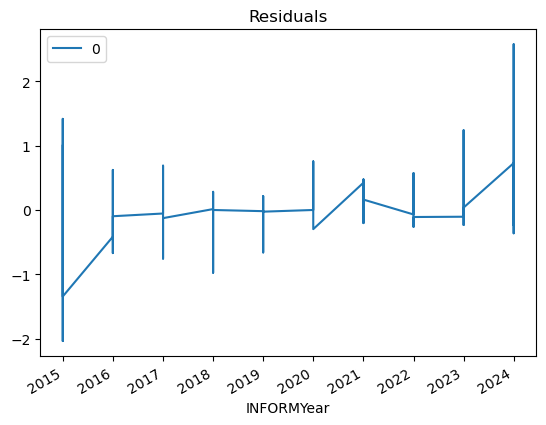

C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


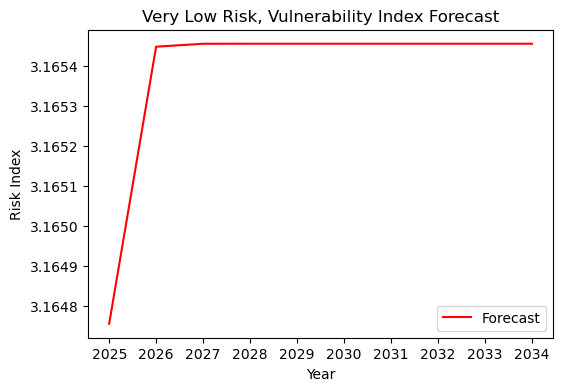

Mean Squared Error (MSE): 1.583103628619634
Mean Absolute Error (MAE): 1.1122929107320618
Root Mean Squared Error (RMSE): 1.2582144605033094


C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [174]:
# Visualize the time series data - Figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
# Plot 1:
#axes[0].grid(True)
axes[0].set_xlabel('Years')
axes[0].set_ylabel('Risk Indices (0-10)')
axes[0].plot(df_vlow['Vulnerability Index'], color = 'darkblue')
axes[0].set_title("Very Low Risk, Vulnerability Indices (2015-2024)")
axes[0].set_ylim([0, 10])

# Plot 2:
#axes[1].grid(True)
axes[1].set_xlabel('Years')
axes[1].set_ylabel('Mean Risk Indices (0-10)')
axes[1].plot(df_vlow.groupby('INFORMYear')['Vulnerability Index'].mean(), color = 'darkblue')
axes[1].set_title("Very Low Risk, Mean Vulnerability indices (2015-2024)")
axes[1].set_ylim([1.5, 2.2])

# Check autocorrelation and partial autocorrelation
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(df_vlow['Vulnerability Index'], ax=ax[0])
plot_pacf(df_vlow['Vulnerability Index'], ax=ax[1])
plt.show()

# Fit ARIMA model
order = (1, 1, 1)  # Example order (p, d, q)
model = ARIMA(df_vlow['Vulnerability Index'], order=order)
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Plot residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(title='Residuals')
plt.show()

# Get the last date in the dataset
last_date = df_vlow.index[-1]

# Calculate the start date for forecasting (first day of the following year)
start_date_forecast = last_date + DateOffset(years=0)

# Plot forecast
forecast_steps = 10  # Example number of forecast steps (for one year)
forecast_dates = pd.date_range(start=start_date_forecast, periods=forecast_steps, freq='Y')  # Start from the first day of the following year
forecast = model_fit.forecast(steps=forecast_steps)

plt.figure(figsize=(6, 4))
plt.plot(forecast_dates, forecast, color='red', label='Forecast')
plt.title('Very Low Risk, Vulnerability Index Forecast')
plt.xlabel('Year')
plt.ylabel('Risk Index')
plt.legend()
plt.show()

# Evaluate the model
# Make sure to have the actual values available for comparison
actual_values = df_vlow['Vulnerability Index'].iloc[-forecast_steps:]  # Actual values for the forecast period

# Calculate predictions
forecast_values = model_fit.forecast(steps=forecast_steps)

# Calculate performance metrics
mse = mean_squared_error(actual_values, forecast_values)
mae = mean_absolute_error(actual_values, forecast_values)
rmse = np.sqrt(mse)

# Print performance metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

#### Low Risk, Vulnerability Index

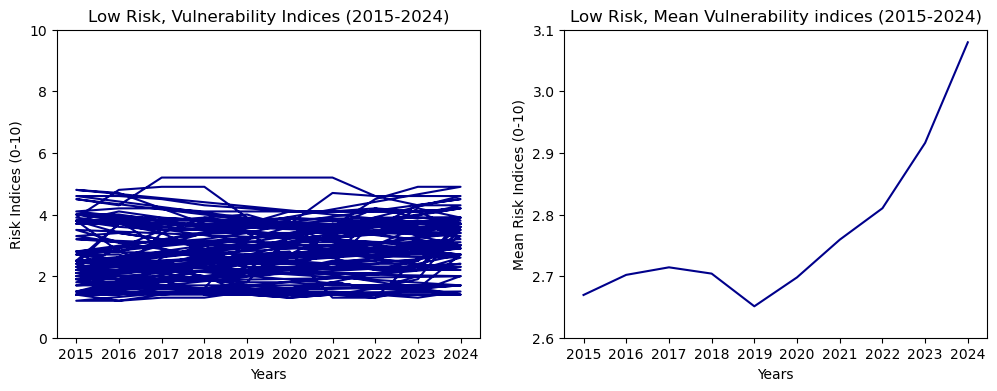

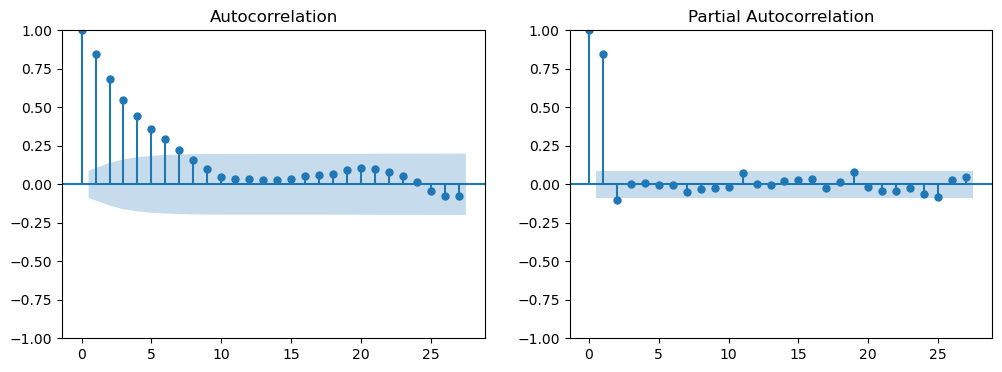

C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Use

                                SARIMAX Results                                
Dep. Variable:     Vulnerability Index   No. Observations:                  490
Model:                  ARIMA(1, 1, 1)   Log Likelihood                -366.625
Date:                 Mon, 08 Apr 2024   AIC                            739.249
Time:                         04:39:28   BIC                            751.826
Sample:                              0   HQIC                           744.189
                                 - 490                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8486      0.032     26.797      0.000       0.787       0.911
ma.L1         -1.0000      3.983     -0.251      0.802      -8.806       6.806
sigma2         0.2603      1.037      0.251 

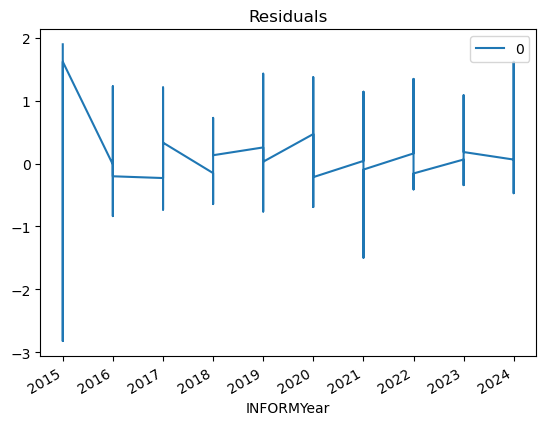

C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


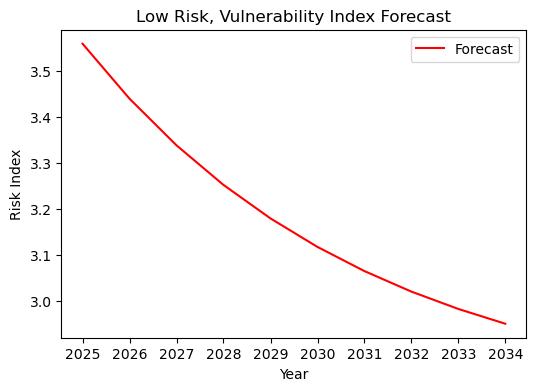

Mean Squared Error (MSE): 0.2795727269637688
Mean Absolute Error (MAE): 0.4472900082770751
Root Mean Squared Error (RMSE): 0.5287463730029444


C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [177]:
# Visualize the time series data - Figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
# Plot 1:
#axes[0].grid(True)
axes[0].set_xlabel('Years')
axes[0].set_ylabel('Risk Indices (0-10)')
axes[0].plot(df_low['Vulnerability Index'], color = 'darkblue')
axes[0].set_title("Low Risk, Vulnerability Indices (2015-2024)")
axes[0].set_ylim([0, 10])

# Plot 2:
#axes[1].grid(True)
axes[1].set_xlabel('Years')
axes[1].set_ylabel('Mean Risk Indices (0-10)')
axes[1].plot(df_low.groupby('INFORMYear')['Vulnerability Index'].mean(), color = 'darkblue')
axes[1].set_title("Low Risk, Mean Vulnerability indices (2015-2024)")
axes[1].set_ylim([2.6, 3.1])

# Check autocorrelation and partial autocorrelation
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(df_low['Vulnerability Index'], ax=ax[0])
plot_pacf(df_low['Vulnerability Index'], ax=ax[1])
plt.show()

# Fit ARIMA model
order = (1, 1, 1)  # Example order (p, d, q)
model = ARIMA(df_low['Vulnerability Index'], order=order)
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Plot residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(title='Residuals')
plt.show()

# Get the last date in the dataset
last_date = df_low.index[-1]

# Calculate the start date for forecasting (first day of the following year)
start_date_forecast = last_date + DateOffset(years=0)

# Plot forecast
forecast_steps = 10  # Example number of forecast steps (for one year)
forecast_dates = pd.date_range(start=start_date_forecast, periods=forecast_steps, freq='Y')  # Start from the first day of the following year
forecast = model_fit.forecast(steps=forecast_steps)

plt.figure(figsize=(6, 4))
plt.plot(forecast_dates, forecast, color='red', label='Forecast')
plt.title('Low Risk, Vulnerability Index Forecast')
plt.xlabel('Year')
plt.ylabel('Risk Index')
plt.legend()
plt.show()

# Evaluate the model
# Make sure to have the actual values available for comparison
actual_values = df_low['Vulnerability Index'].iloc[-forecast_steps:]  # Actual values for the forecast period

# Calculate predictions
forecast_values = model_fit.forecast(steps=forecast_steps)

# Calculate performance metrics
mse = mean_squared_error(actual_values, forecast_values)
mae = mean_absolute_error(actual_values, forecast_values)
rmse = np.sqrt(mse)

# Print performance metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

#### Medium Risk, Vulnerability Index

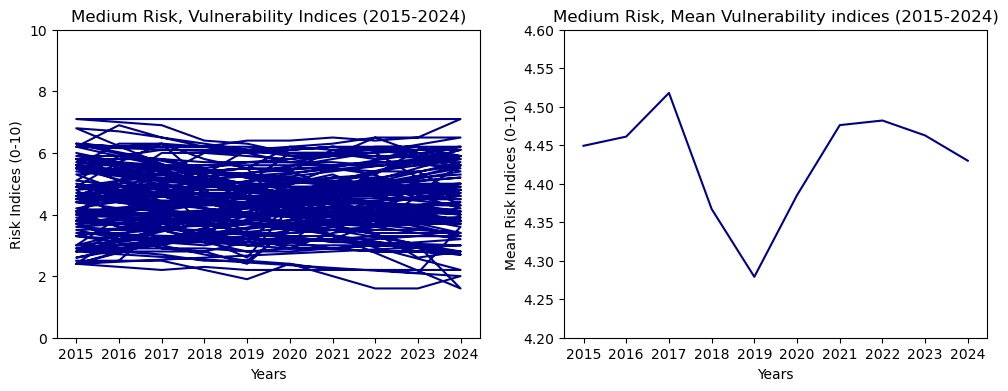

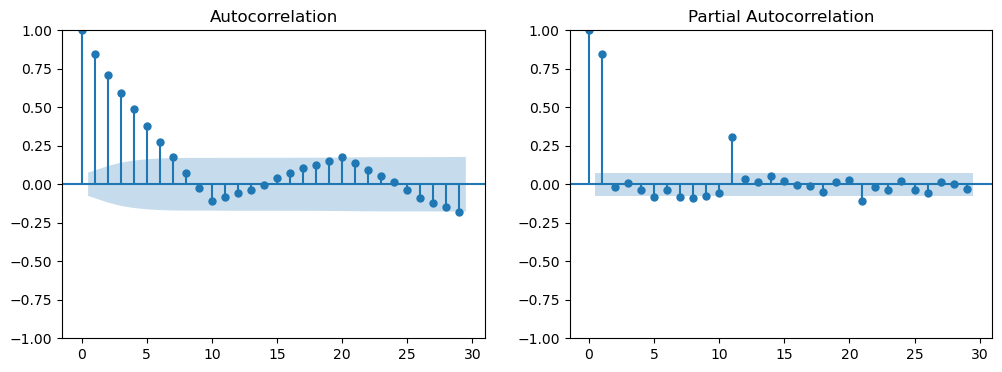

C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Use

                                SARIMAX Results                                
Dep. Variable:     Vulnerability Index   No. Observations:                  670
Model:                  ARIMA(1, 1, 1)   Log Likelihood                -633.906
Date:                 Mon, 08 Apr 2024   AIC                           1273.813
Time:                         04:43:45   BIC                           1287.330
Sample:                              0   HQIC                          1279.049
                                 - 670                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8499      0.030     28.063      0.000       0.791       0.909
ma.L1         -0.9998      0.073    -13.789      0.000      -1.142      -0.858
sigma2         0.3873      0.030     12.873 

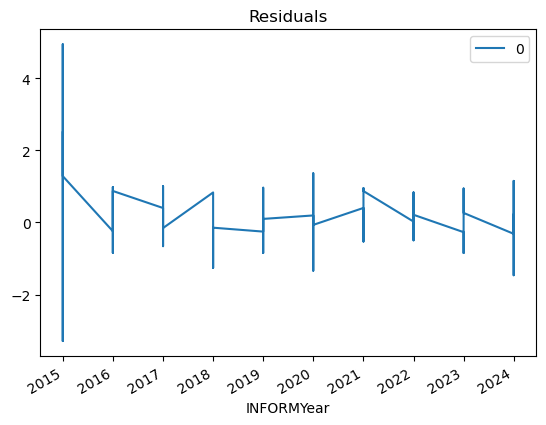

C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


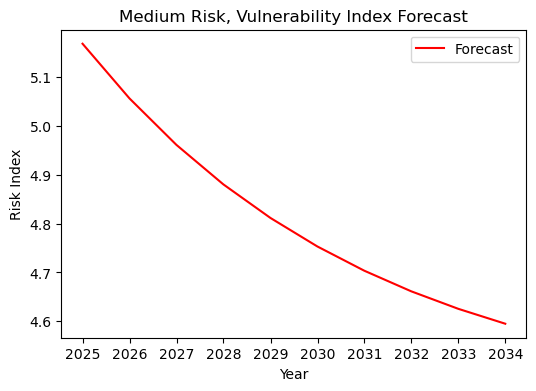

Mean Squared Error (MSE): 0.8217599681280845
Mean Absolute Error (MAE): 0.7820684905056288
Root Mean Squared Error (RMSE): 0.906509772770313


C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [180]:
# Visualize the time series data - Figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
# Plot 1:
#axes[0].grid(True)
axes[0].set_xlabel('Years')
axes[0].set_ylabel('Risk Indices (0-10)')
axes[0].plot(df_med['Vulnerability Index'], color = 'darkblue')
axes[0].set_title("Medium Risk, Vulnerability Indices (2015-2024)")
axes[0].set_ylim([0, 10])

# Plot 2:
#axes[1].grid(True)
axes[1].set_xlabel('Years')
axes[1].set_ylabel('Mean Risk Indices (0-10)')
axes[1].plot(df_med.groupby('INFORMYear')['Vulnerability Index'].mean(), color = 'darkblue')
axes[1].set_title("Medium Risk, Mean Vulnerability indices (2015-2024)")
axes[1].set_ylim([4.2, 4.6])

# Check autocorrelation and partial autocorrelation
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(df_med['Vulnerability Index'], ax=ax[0])
plot_pacf(df_med['Vulnerability Index'], ax=ax[1])
plt.show()

# Fit ARIMA model
order = (1, 1, 1)  # Example order (p, d, q)
model = ARIMA(df_med['Vulnerability Index'], order=order)
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Plot residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(title='Residuals')
plt.show()

# Get the last date in the dataset
last_date = df_med.index[-1]

# Calculate the start date for forecasting (first day of the following year)
start_date_forecast = last_date + DateOffset(years=0)

# Plot forecast
forecast_steps = 10  # Example number of forecast steps (for one year)
forecast_dates = pd.date_range(start=start_date_forecast, periods=forecast_steps, freq='Y')  # Start from the first day of the following year
forecast = model_fit.forecast(steps=forecast_steps)

plt.figure(figsize=(6, 4))
plt.plot(forecast_dates, forecast, color='red', label='Forecast')
plt.title('Medium Risk, Vulnerability Index Forecast')
plt.xlabel('Year')
plt.ylabel('Risk Index')
plt.legend()
plt.show()

# Evaluate the model
# Make sure to have the actual values available for comparison
actual_values = df_med['Vulnerability Index'].iloc[-forecast_steps:]  # Actual values for the forecast period

# Calculate predictions
forecast_values = model_fit.forecast(steps=forecast_steps)

# Calculate performance metrics
mse = mean_squared_error(actual_values, forecast_values)
mae = mean_absolute_error(actual_values, forecast_values)
rmse = np.sqrt(mse)

# Print performance metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

#### High Risk, Vulnerability Index

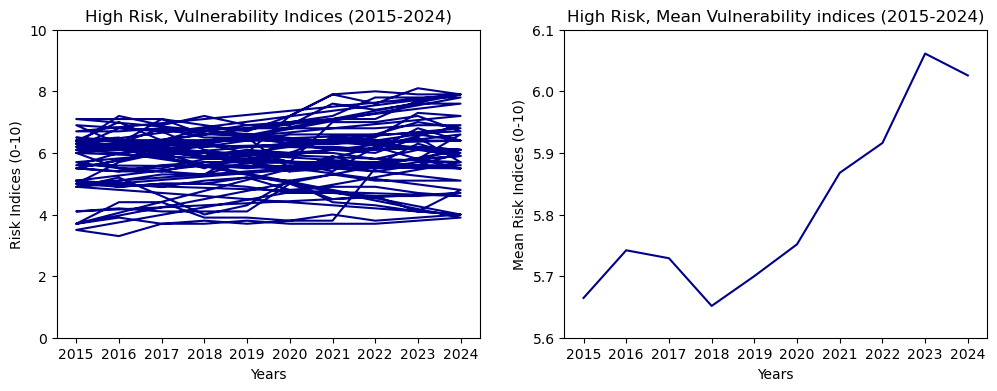

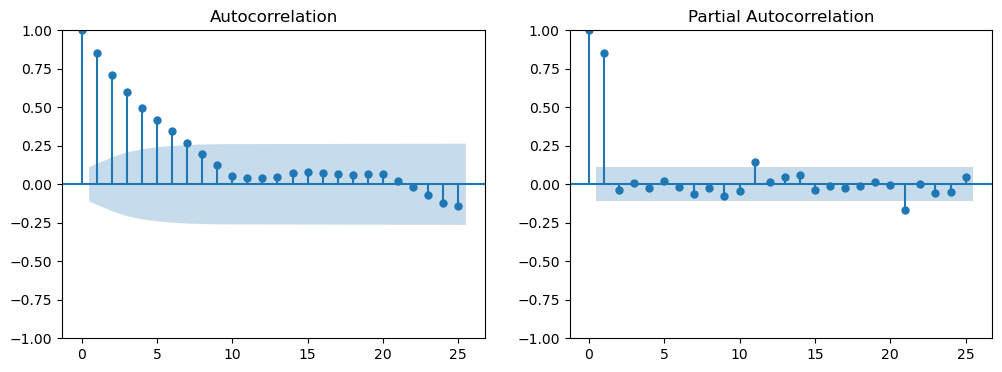

C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Use

                                SARIMAX Results                                
Dep. Variable:     Vulnerability Index   No. Observations:                  310
Model:                  ARIMA(1, 1, 1)   Log Likelihood                -250.370
Date:                 Mon, 08 Apr 2024   AIC                            506.741
Time:                         04:46:43   BIC                            517.941
Sample:                              0   HQIC                           511.218
                                 - 310                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8547      0.036     24.018      0.000       0.785       0.924
ma.L1         -1.0000      2.451     -0.408      0.683      -5.804       3.804
sigma2         0.2929      0.722      0.406 

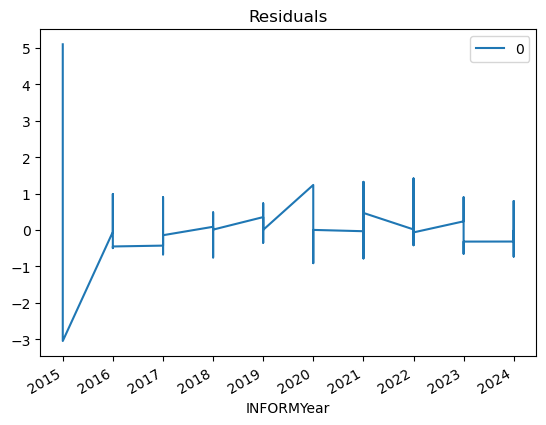

C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


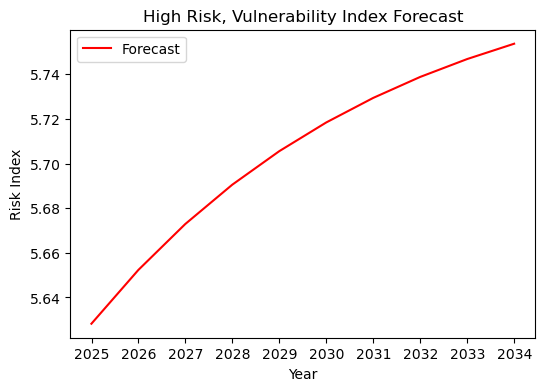

Mean Squared Error (MSE): 2.087772772142515
Mean Absolute Error (MAE): 1.243671031554546
Root Mean Squared Error (RMSE): 1.444912721288907


C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [184]:
# Visualize the time series data - Figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
# Plot 1:
#axes[0].grid(True)
axes[0].set_xlabel('Years')
axes[0].set_ylabel('Risk Indices (0-10)')
axes[0].plot(df_high['Vulnerability Index'], color = 'darkblue')
axes[0].set_title("High Risk, Vulnerability Indices (2015-2024)")
axes[0].set_ylim([0, 10])

# Plot 2:
#axes[1].grid(True)
axes[1].set_xlabel('Years')
axes[1].set_ylabel('Mean Risk Indices (0-10)')
axes[1].plot(df_high.groupby('INFORMYear')['Vulnerability Index'].mean(), color = 'darkblue')
axes[1].set_title("High Risk, Mean Vulnerability indices (2015-2024)")
axes[1].set_ylim([5.6, 6.1])

# Check autocorrelation and partial autocorrelation
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(df_high['Vulnerability Index'], ax=ax[0])
plot_pacf(df_high['Vulnerability Index'], ax=ax[1])
plt.show()

# Fit ARIMA model
order = (1, 1, 1)  # Example order (p, d, q)
model = ARIMA(df_high['Vulnerability Index'], order=order)
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Plot residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(title='Residuals')
plt.show()

# Get the last date in the dataset
last_date = df_high.index[-1]

# Calculate the start date for forecasting (first day of the following year)
start_date_forecast = last_date + DateOffset(years=0)

# Plot forecast
forecast_steps = 10  # Example number of forecast steps (for one year)
forecast_dates = pd.date_range(start=start_date_forecast, periods=forecast_steps, freq='Y')  # Start from the first day of the following year
forecast = model_fit.forecast(steps=forecast_steps)

plt.figure(figsize=(6, 4))
plt.plot(forecast_dates, forecast, color='red', label='Forecast')
plt.title('High Risk, Vulnerability Index Forecast')
plt.xlabel('Year')
plt.ylabel('Risk Index')
plt.legend()
plt.show()

# Evaluate the model
# Make sure to have the actual values available for comparison
actual_values = df_high['Vulnerability Index'].iloc[-forecast_steps:]  # Actual values for the forecast period

# Calculate predictions
forecast_values = model_fit.forecast(steps=forecast_steps)

# Calculate performance metrics
mse = mean_squared_error(actual_values, forecast_values)
mae = mean_absolute_error(actual_values, forecast_values)
rmse = np.sqrt(mse)

# Print performance metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

#### Very High Risk, Vulnerability Index

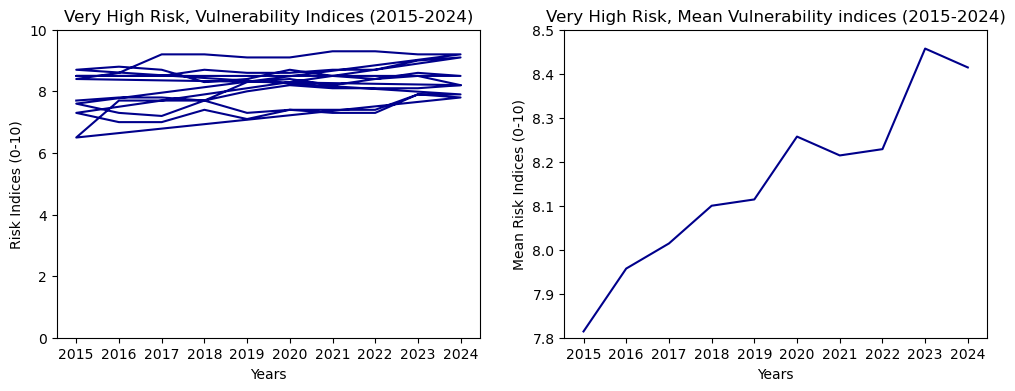

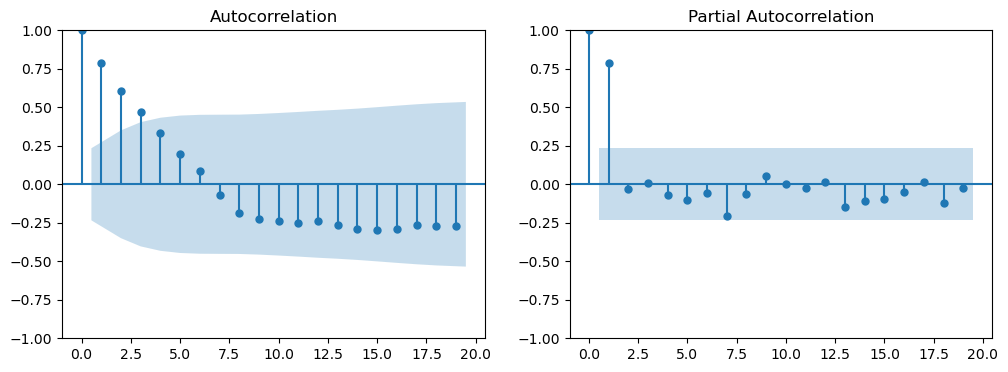

C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Use

                                SARIMAX Results                                
Dep. Variable:     Vulnerability Index   No. Observations:                   70
Model:                  ARIMA(1, 1, 1)   Log Likelihood                 -37.413
Date:                 Mon, 08 Apr 2024   AIC                             80.826
Time:                         04:49:50   BIC                             87.528
Sample:                              0   HQIC                            83.485
                                  - 70                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8045      0.133      6.039      0.000       0.543       1.066
ma.L1         -1.0000    206.818     -0.005      0.996    -406.356     404.356
sigma2         0.1679     34.716      0.005 

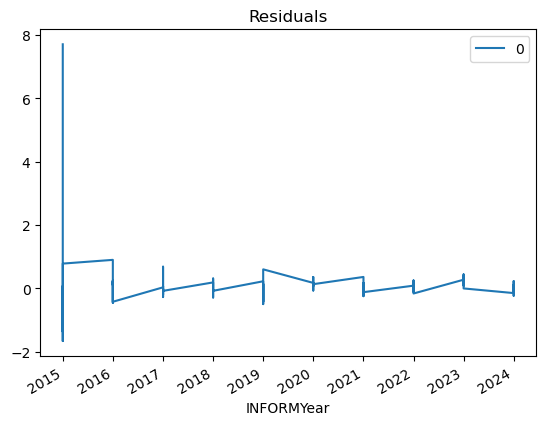

C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


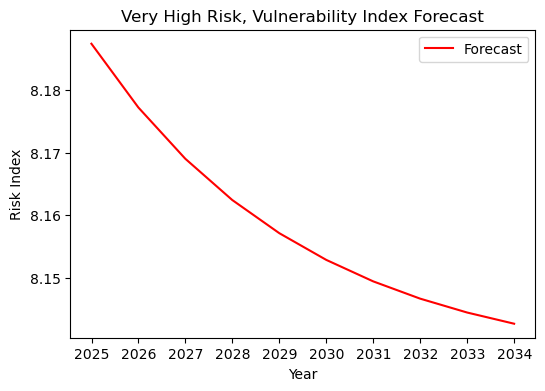

Mean Squared Error (MSE): 0.3545506871275879
Mean Absolute Error (MAE): 0.34981788796145186
Root Mean Squared Error (RMSE): 0.5954415900217148


C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [187]:
# Visualize the time series data - Figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
# Plot 1:
#axes[0].grid(True)
axes[0].set_xlabel('Years')
axes[0].set_ylabel('Risk Indices (0-10)')
axes[0].plot(df_vhigh['Vulnerability Index'], color = 'darkblue')
axes[0].set_title("Very High Risk, Vulnerability Indices (2015-2024)")
axes[0].set_ylim([0, 10])

# Plot 2:
#axes[1].grid(True)
axes[1].set_xlabel('Years')
axes[1].set_ylabel('Mean Risk Indices (0-10)')
axes[1].plot(df_vhigh.groupby('INFORMYear')['Vulnerability Index'].mean(), color = 'darkblue')
axes[1].set_title("Very High Risk, Mean Vulnerability indices (2015-2024)")
axes[1].set_ylim([7.8, 8.5])

# Check autocorrelation and partial autocorrelation
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(df_vhigh['Vulnerability Index'], ax=ax[0])
plot_pacf(df_vhigh['Vulnerability Index'], ax=ax[1])
plt.show()

# Fit ARIMA model
order = (1, 1, 1)  # Example order (p, d, q)
model = ARIMA(df_vhigh['Vulnerability Index'], order=order)
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Plot residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(title='Residuals')
plt.show()

# Get the last date in the dataset
last_date = df_vhigh.index[-1]

# Calculate the start date for forecasting (first day of the following year)
start_date_forecast = last_date + DateOffset(years=0)

# Plot forecast
forecast_steps = 10  # Example number of forecast steps (for one year)
forecast_dates = pd.date_range(start=start_date_forecast, periods=forecast_steps, freq='Y')  # Start from the first day of the following year
forecast = model_fit.forecast(steps=forecast_steps)

plt.figure(figsize=(6, 4))
plt.plot(forecast_dates, forecast, color='red', label='Forecast')
plt.title('Very High Risk, Vulnerability Index Forecast')
plt.xlabel('Year')
plt.ylabel('Risk Index')
plt.legend()
plt.show()

# Evaluate the model
# Make sure to have the actual values available for comparison
actual_values = df_vhigh['Vulnerability Index'].iloc[-forecast_steps:]  # Actual values for the forecast period

# Calculate predictions
forecast_values = model_fit.forecast(steps=forecast_steps)

# Calculate performance metrics
mse = mean_squared_error(actual_values, forecast_values)
mae = mean_absolute_error(actual_values, forecast_values)
rmse = np.sqrt(mse)

# Print performance metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

In [1]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Splitting the dataset into train and test sets
train_size = int(len(df) * 0.8)  # 80% train, 20% test
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Visualize the time series data
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
# Plot 1:
axes[0].set_xlabel('Years')
axes[0].set_ylabel('Risk Indices (0-10)')
axes[0].plot(train['INFORM Risk Index'], color='darkgrey', label='Train')
axes[0].plot(test['INFORM Risk Index'], color='lightcoral', label='Test')
axes[0].set_title("INFORM Risk Indices (Train and Test)")
axes[0].legend()

# Plot 2:
axes[1].set_xlabel('Years')
axes[1].set_ylabel('Mean Risk Indices (0-10)')
axes[1].plot(train.groupby('INFORMYear')['INFORM Risk Index'].mean(), color='darkgrey', label='Train')
axes[1].plot(test.groupby('INFORMYear')['INFORM Risk Index'].mean(), color='lightcoral', label='Test')
axes[1].set_title("Mean INFORM indices (Train and Test)")
axes[1].legend()

plt.show()

# Check autocorrelation and partial autocorrelation
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(train['INFORM Risk Index'], ax=ax[0])
plot_pacf(train['INFORM Risk Index'], ax=ax[1])
plt.show()

# Fit ARIMA model
order = (1, 1, 1)  # Example order (p, d, q)
model = ARIMA(train['INFORM Risk Index'], order=order)
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Plot residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(title='Residuals')
plt.show()

# Plot forecast
forecast_steps = len(test)  # Forecast steps equal to the length of the test set
forecast_dates = test.index  # Forecast dates corresponding to the test set
forecast = model_fit.forecast(steps=forecast_steps)

plt.figure(figsize=(6, 4))
plt.plot(train.index, train['INFORM Risk Index'], label='Train', color='darkgrey')
plt.plot(test.index, test['INFORM Risk Index'], label='Test', color='lightcoral')
plt.plot(forecast_dates, forecast, color='red', label='Forecast')
plt.title('INFORM Risk Index Forecast')
plt.xlabel('Year')
plt.ylabel('Risk Index')
plt.legend()
plt.show()

# Evaluate the model
actual_values = test['INFORM Risk Index']
mse = mean_squared_error(actual_values, forecast)
mae = mean_absolute_error(actual_values, forecast)
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)


NameError: name 'df' is not defined

In [56]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Evaluate the model
# Make sure to have the actual values available for comparison
actual_values = df['INFORM Risk Index'].iloc[-forecast_steps:]  # Actual values for the forecast period

# Calculate predictions
forecast_values = model_fit.forecast(steps=forecast_steps)

# Calculate performance metrics
mse = mean_squared_error(actual_values, forecast_values)
mae = mean_absolute_error(actual_values, forecast_values)
rmse = np.sqrt(mse)

# Print performance metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 0.10595662427130725
Mean Absolute Error (MAE): 0.29619233818658486
Root Mean Squared Error (RMSE): 0.32550979136011754


C:\Users\oakpogheneta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
# report performance
#mse = mean_squared_error(y, predictions)
#print('MSE: '+str(mse))
#mae = mean_absolute_error(y, predictions)
#print('MAE: '+str(mae))
#rmse = math.sqrt(mean_squared_error(y, predictions))
#print('RMSE: '+str(rmse))

In [ ]:
#df.index.freq = 'Y'  # Set frequency to 'Y' for yearly

# Plot forecast
#forecast_steps = 10  # Example number of forecast steps
#forecast_dates = pd.date_range(start=df.index[-1], periods=forecast_steps + 1, freq=df.index.freq)[1:]  # Use existing frequency
#forecast = model_fit.forecast(steps=forecast_steps)
#plt.figure(figsize=(10, 6))
#plt.plot(df.index, df['INFORM Risk Index'], label='Original')
#plt.plot(forecast_dates, forecast, color='red', label='Forecast')
#plt.title('Forecast')
#plt.xlabel('Date')
#plt.ylabel('Value')
#plt.legend()
#plt.show()

# Plot forecast
#forecast_steps = 10  # Example number of forecast steps
#forecast = model_fit.forecast(steps=forecast_steps)
#plt.figure(figsize=(10, 6))
#plt.plot(df.index, df['INFORM Risk Index'], label='Original')
#plt.plot(pd.date_range(start=df.index[-1], periods=forecast_steps + 1, freq='M')[1:], forecast, color='red', label='Forecast')
#plt.title('Forecast')
#plt.xlabel('Date')
#plt.ylabel('Value')
#plt.legend()
#plt.show()

In [ ]:
#from statsmodels.tsa.arima.model import ARIMA
#from sklearn.metrics import mean_squared_error, mean_absolute_error
#import math

#### Assuming df is your original DataFrame with time series data for different locations
#### Calculate the mean of the variable across different locations for each time point
#mean_by_time = df.groupby('INFORMYear')['INFORM Risk Index'].mean()

#### Combine original data with mean values
#combined_data = pd.merge(df, mean_by_time, left_on='INFORMYear', right_index=True, suffixes=('', '_mean'))

#### Fit ARIMA model using the combined dataset
#model = ARIMA(combined_data['INFORM Risk Index'], order=(1, 1, 0), exog=combined_data['INFORM Risk Index'])
#model_fit = model.fit()

#### Evaluate model performance and make forecasts
#### (Note: You may need to split the data into training & testing sets for evaluation)

In [69]:
#from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create a figure and axes for the subplots
#fig, axes = plt.subplots(1, 2, figsize=(16, 3), dpi=100)
#plot_acf(df['INFORM Risk Index'].tolist(), lags=50, ax=axes[0])
#plot_pacf(df['INFORM Risk Index'].tolist(), lags=50, ax=axes[1])

#plt.show()

In [ ]:
#from statsmodels.tsa.arima.model import ARIMA

# Split the data into training and testing sets
#train_data, test_data = df['INFORM Risk Index'][:int(len(df)*0.9)], df['INFORM Risk Index'][int(len(df)*0.9):]

# Convert training data to list
#train_arima = train_data.tolist()

# Initialize empty list for storing predictions
#predictions = []

# Loop through each observation in the test set
#for t in range(len(test_data)):
    # Fit ARIMA model
 #   model = ARIMA(train_arima, order=(1, 1, 0))
  #  model_fit = model.fit()

    # Make prediction
   # yhat = model_fit.forecast()[0]
    #predictions.append(yhat)

    # Append true observation to history for the next iteration
    #train_arima.append(test_data[t])

# Print the first 5 predictions
#print(predictions[:5])

# rolling forecasts
#for i in range(1, len(y)):
    # predict
 #   model = ARIMA(history, order=(1,1,0))
  #  model_fit = model.fit()
  #  yhat = model_fit.forecast()[0]
    # invert transformed prediction
   # predictions.append(yhat)
    # observation
    #obs = y[i]
    #history.append(obs)

In [50]:
#from statsmodels.tsa.arima.model import ARIMA

# Split the data into training and testing sets
#train_data, test_data = df['INFORM Risk Index'][:int(len(df)*0.9)], df['INFORM Risk Index'][int(len(df)*0.9):]

# Convert training data to list
#train_arima = train_data.tolist()

# Initialize empty list for storing predictions
#predictions = []

# Loop through each observation in the test set
#for t in range(len(test_data)):
    # Fit ARIMA model
 #   model = ARIMA(train_arima, order=(1, 1, 0))
  #  model_fit = model.fit()

    # Make prediction
   # yhat = model_fit.forecast()[0]
    #predictions.append(yhat)

    # Append true observation to history for the next iteration
    #train_arima.append(test_data[t])

# Print the first 5 predictions
#print(predictions[:5])

# rolling forecasts
#for i in range(1, len(y)):
    # predict
 #   model = ARIMA(history, order=(1,1,0))
  #  model_fit = model.fit()
   # yhat = model_fit.forecast()[0]
    # invert transformed prediction
    #predictions.append(yhat)
    # observation
    #obs = y[i]
    #history.append(obs)

[3.3, 3.3, 2.0968946116911305, 2.200246539558359, 2.2]


In [ ]:
#from statsmodels.tsa.arima.model import ARIMA
#from sklearn.metrics import mean_squared_error, mean_absolute_error
#import math

#train_data, test_data = df[0:int(len(df)*0.9)], df[int(len(df)*0.9):]

#train_arima = train_data['INFORM Risk Index']
#test_arima = test_data['INFORM Risk Index']

#history = [x for x in train_arima]
#y = test_arima
# make first prediction
#predictions = list()
#model = ARIMA(history, order=(1,1,0))
#model_fit = model.fit()
#yhat = model_fit.forecast()[0]
#predictions.append(yhat)
#history.append(y[0])

In [ ]:
#train_data, test_data = df[0:int(len(df)*0.9)], df[int(len(df)*0.9):]

#train_arima = train_data['INFORM Risk Index']
#test_arima = test_data['INFORM Risk Index']

#history = [x for x in train_arima]
#y = test_arima
# make first prediction
#predictions = list()
#model = ARIMA(history, order=(1,1,0))
#model_fit = model.fit()
#yhat = model_fit.forecast()[0]
#predictions.append(yhat)
#history.append(y[0])

In [ ]:
# report performance
#mse = mean_squared_error(y, predictions)
#print('MSE: '+str(mse))
#mae = mean_absolute_error(y, predictions)
#print('MAE: '+str(mae))
#rmse = math.sqrt(mean_squared_error(y, predictions))
#print('RMSE: '+str(rmse))

In [ ]:
#import matplotlib.pyplot as plt
#plt.figure(figsize=(16,8))
#plt.plot(df.index[-600:], df['INFORM Risk Index'].tail(600), color='green', label = 'Index')
#plt.plot(test_data.index, y, color = 'red', label = 'Real index')
#plt.plot(test_data.index, predictions, color = 'blue', label = 'Predicted index')
#plt.title('Overall Index Prediction')
#plt.xlabel('Time')
#plt.ylabel('Index')
#plt.legend()
#plt.grid(True)

In [ ]:
#import matplotlib.pyplot as plt
#plt.figure(figsize=(16,8))
#plt.plot(df.index[-600:], df['INFORM Risk Index'].tail(600), color='green', label = 'Index')
#plt.plot(test_data.index, y, color = 'red', label = 'Real index')
#plt.plot(test_data.index, predictions, color = 'blue', label = 'Predicted index')
#plt.title('Overall Index Prediction')
#plt.xlabel('Time')
#plt.ylabel('Index')
#plt.legend()
#plt.grid(True)